In [2]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'swe100a'
swe100a = Run("swe100a")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
swe100a.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

swe100a.Process.Topology.P = 1
swe100a.Process.Topology.Q = 1
swe100a.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
swe100a.ComputationalGrid.Lower.X = 0.0
swe100a.ComputationalGrid.Lower.Y = 0.0
swe100a.ComputationalGrid.Lower.Z = 0.0

swe100a.ComputationalGrid.DX      = 2.0
swe100a.ComputationalGrid.DY      = 2.0
swe100a.ComputationalGrid.DZ      = 0.1

swe100a.ComputationalGrid.NX      = 1
swe100a.ComputationalGrid.NY      = 1
swe100a.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
swe100a.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
swe100a.GeomInput.domain_input.InputType = 'Box'
swe100a.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
swe100a.Geom.domain.Lower.X = 0.0
swe100a.Geom.domain.Lower.Y = 0.0
swe100a.Geom.domain.Lower.Z = 0.0

swe100a.Geom.domain.Upper.X = 2.0
swe100a.Geom.domain.Upper.Y = 2.0
swe100a.Geom.domain.Upper.Z = 2.0

swe100a.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

swe100a.Solver.Nonlinear.VariableDz = True
swe100a.dzScale.GeomNames           = 'domain'
swe100a.dzScale.Type                = 'nzList'
swe100a.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
swe100a.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
swe100a.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
swe100a.Cell._2.dzScale.Value  = 1.0   
swe100a.Cell._3.dzScale.Value  = 1.0
swe100a.Cell._4.dzScale.Value  = 1.0
swe100a.Cell._5.dzScale.Value  = 1.0
swe100a.Cell._6.dzScale.Value  = 1.0
swe100a.Cell._7.dzScale.Value  = 1.0
swe100a.Cell._8.dzScale.Value  = 1.0
swe100a.Cell._9.dzScale.Value  = 1.0
swe100a.Cell._10.dzScale.Value = 1.0
swe100a.Cell._11.dzScale.Value = 1.0
swe100a.Cell._12.dzScale.Value = 1.0
swe100a.Cell._13.dzScale.Value = 1.0
swe100a.Cell._14.dzScale.Value = 1.0
swe100a.Cell._15.dzScale.Value = 1.0
swe100a.Cell._16.dzScale.Value = 1.0
swe100a.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
swe100a.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
swe100a.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
swe100a.Geom.Perm.Names              = 'domain'
swe100a.Geom.domain.Perm.Type        = 'Constant'
swe100a.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
swe100a.Perm.TensorType              = 'TensorByGeom'
swe100a.Geom.Perm.TensorByGeom.Names = 'domain'
swe100a.Geom.domain.Perm.TensorValX  = 1.0
swe100a.Geom.domain.Perm.TensorValY  = 1.0
swe100a.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

swe100a.SpecificStorage.Type              = 'Constant'
swe100a.SpecificStorage.GeomNames         = 'domain'
swe100a.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

swe100a.Phase.Names = 'water'

swe100a.Phase.water.Density.Type     = 'Constant'
swe100a.Phase.water.Density.Value    = 1.0

swe100a.Phase.water.Viscosity.Type   = 'Constant'
swe100a.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
swe100a.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

swe100a.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

swe100a.TimingInfo.BaseUnit     = 1.0
swe100a.TimingInfo.StartCount   = 0
swe100a.TimingInfo.StartTime    = 0.0
swe100a.TimingInfo.StopTime     = stopt
swe100a.TimingInfo.DumpInterval = 1.0
swe100a.TimeStep.Type           = 'Constant'
swe100a.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

swe100a.Geom.Porosity.GeomNames    = 'domain'

swe100a.Geom.domain.Porosity.Type  = 'Constant'
swe100a.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
swe100a.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
swe100a.Phase.water.Mobility.Type  = 'Constant'
swe100a.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

swe100a.Phase.RelPerm.Type        = 'VanGenuchten'
swe100a.Phase.RelPerm.GeomNames   = 'domain'

swe100a.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
swe100a.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

swe100a.Phase.Saturation.Type        = 'VanGenuchten'
swe100a.Phase.Saturation.GeomNames   = 'domain'

swe100a.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
swe100a.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#swe100a.Geom.domain.Saturation.SRes  = 0.2
swe100a.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

swe100a.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
swe100a.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
swe100a.Cycle.Names = 'constant'
swe100a.Cycle.constant.Names = 'alltime'
swe100a.Cycle.constant.alltime.Length = 1
swe100a.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
swe100a.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

swe100a.Patch.x_lower.BCPressure.Type          = 'FluxConst'
swe100a.Patch.x_lower.BCPressure.Cycle         = 'constant'
swe100a.Patch.x_lower.BCPressure.alltime.Value = 0.0

swe100a.Patch.y_lower.BCPressure.Type          = 'FluxConst'
swe100a.Patch.y_lower.BCPressure.Cycle         = 'constant'
swe100a.Patch.y_lower.BCPressure.alltime.Value = 0.0

#swe100a.Patch.z_lower.BCPressure.Type = 'FluxConst'
swe100a.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
swe100a.Patch.z_lower.BCPressure.RefGeom       = 'domain'
swe100a.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
swe100a.Patch.z_lower.BCPressure.Cycle         = 'constant'
swe100a.Patch.z_lower.BCPressure.alltime.Value = 0.0

swe100a.Patch.x_upper.BCPressure.Type          = 'FluxConst'
swe100a.Patch.x_upper.BCPressure.Cycle         = 'constant'
swe100a.Patch.x_upper.BCPressure.alltime.Value = 0.0

swe100a.Patch.y_upper.BCPressure.Type          = 'FluxConst'
swe100a.Patch.y_upper.BCPressure.Cycle         = 'constant'
swe100a.Patch.y_upper.BCPressure.alltime.Value = 0.0

swe100a.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
swe100a.Patch.z_upper.BCPressure.Cycle         = 'constant'
swe100a.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

swe100a.TopoSlopesX.Type              = 'Constant'
swe100a.TopoSlopesX.GeomNames         = 'domain'
swe100a.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

swe100a.TopoSlopesY.Type              = 'Constant'
swe100a.TopoSlopesY.GeomNames         = 'domain'
swe100a.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

swe100a.Mannings.Type               = 'Constant'
swe100a.Mannings.GeomNames          = 'domain'
swe100a.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

swe100a.PhaseSources.water.Type              = 'Constant'
swe100a.PhaseSources.water.GeomNames         = 'domain'
swe100a.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

swe100a.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

swe100a.Solver         = 'Richards'
swe100a.Solver.MaxIter = 9000

swe100a.Solver.Nonlinear.MaxIter           = 100
swe100a.Solver.Nonlinear.ResidualTol       = 1e-5
swe100a.Solver.Nonlinear.EtaChoice         = 'Walker1'
swe100a.Solver.Nonlinear.EtaValue          = 0.01
swe100a.Solver.Nonlinear.UseJacobian       = False
swe100a.Solver.Nonlinear.DerivativeEpsilon = 1e-12
swe100a.Solver.Nonlinear.StepTol           = 1e-30
swe100a.Solver.Nonlinear.Globalization     = 'LineSearch'
swe100a.Solver.Linear.KrylovDimension      = 100
swe100a.Solver.Linear.MaxRestarts          = 5
swe100a.Solver.Linear.Preconditioner       = 'PFMG'
swe100a.Solver.PrintSubsurf                = False
swe100a.Solver.Drop                        = 1E-20
swe100a.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
swe100a.Solver.PrintSubsurfData         = write_pfb
swe100a.Solver.PrintPressure            = write_pfb
swe100a.Solver.PrintSaturation          = write_pfb
swe100a.Solver.PrintCLM                 = write_pfb
swe100a.Solver.PrintMask                = False
swe100a.Solver.PrintSpecificStorage     = False
swe100a.Solver.WriteSiloMannings        = False
swe100a.Solver.WriteSiloMask            = False
swe100a.Solver.WriteSiloSlopes          = False
swe100a.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#swe100a.NetCDF.NumStepsPerFile          = 240
swe100a.NetCDF.WritePressure            = write_netcdf
swe100a.NetCDF.WriteSubsurface          = False
swe100a.NetCDF.WriteSaturation          = write_netcdf
swe100a.NetCDF.WriteCLM                 = write_netcdf
#swe100a.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
swe100a.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
swe100a.Solver.CLM.MetForcing   = '1D'
#swe100a.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
swe100a.Solver.CLM.MetFileName = 'precip test1.txt'
#swe100a.Solver.CLM.MetFileName = 'forcing_1.txt'
#swe100a.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#swe100a.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
swe100a.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
swe100a.Solver.CLM.EvapBeta       = 'Linear'
swe100a.Solver.CLM.VegWaterStress = 'Saturation'
#swe100a.Solver.CLM.ResSat         = 0.2
swe100a.Solver.CLM.ResSat         = 0.14 #0.14
swe100a.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
swe100a.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
swe100a.Solver.CLM.IrrigationType = 'none'
swe100a.Solver.CLM.RootZoneNZ     =  19
swe100a.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
swe100a.Solver.PrintLSMSink        = False
swe100a.Solver.CLM.CLMDumpInterval = 1
swe100a.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
swe100a.Solver.CLM.BinaryOutDir    = False
swe100a.Solver.CLM.IstepStart      = 1
swe100a.Solver.WriteCLMBinary      = False
swe100a.Solver.WriteSiloCLM        = False
swe100a.Solver.CLM.WriteLogs       = False
swe100a.Solver.CLM.WriteLastRST    = True
swe100a.Solver.CLM.DailyRST        = False
swe100a.Solver.CLM.SingleFile      = True
#swe100a.NetCDF.Compression         = True
#swe100a.NetCDF.ROMIOhints='romio.hints'
#swe100a.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

swe100a.ICPressure.Type                 = 'HydroStaticPatch'
swe100a.ICPressure.GeomNames            = 'domain'
swe100a.Geom.domain.ICPressure.Value    = -1.0
swe100a.Geom.domain.ICPressure.RefGeom  = 'domain'
swe100a.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

swe100a.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - swe100a.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [50]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'swe1300a'
swe1300a = Run("swe1300a")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
swe1300a.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

swe1300a.Process.Topology.P = 1
swe1300a.Process.Topology.Q = 1
swe1300a.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
swe1300a.ComputationalGrid.Lower.X = 0.0
swe1300a.ComputationalGrid.Lower.Y = 0.0
swe1300a.ComputationalGrid.Lower.Z = 0.0

swe1300a.ComputationalGrid.DX      = 2.0
swe1300a.ComputationalGrid.DY      = 2.0
swe1300a.ComputationalGrid.DZ      = 0.1

swe1300a.ComputationalGrid.NX      = 1
swe1300a.ComputationalGrid.NY      = 1
swe1300a.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
swe1300a.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
swe1300a.GeomInput.domain_input.InputType = 'Box'
swe1300a.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
swe1300a.Geom.domain.Lower.X = 0.0
swe1300a.Geom.domain.Lower.Y = 0.0
swe1300a.Geom.domain.Lower.Z = 0.0

swe1300a.Geom.domain.Upper.X = 2.0
swe1300a.Geom.domain.Upper.Y = 2.0
swe1300a.Geom.domain.Upper.Z = 2.0

swe1300a.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

swe1300a.Solver.Nonlinear.VariableDz = True
swe1300a.dzScale.GeomNames           = 'domain'
swe1300a.dzScale.Type                = 'nzList'
swe1300a.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
swe1300a.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
swe1300a.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
swe1300a.Cell._2.dzScale.Value  = 1.0   
swe1300a.Cell._3.dzScale.Value  = 1.0
swe1300a.Cell._4.dzScale.Value  = 1.0
swe1300a.Cell._5.dzScale.Value  = 1.0
swe1300a.Cell._6.dzScale.Value  = 1.0
swe1300a.Cell._7.dzScale.Value  = 1.0
swe1300a.Cell._8.dzScale.Value  = 1.0
swe1300a.Cell._9.dzScale.Value  = 1.0
swe1300a.Cell._10.dzScale.Value = 1.0
swe1300a.Cell._11.dzScale.Value = 1.0
swe1300a.Cell._12.dzScale.Value = 1.0
swe1300a.Cell._13.dzScale.Value = 1.0
swe1300a.Cell._14.dzScale.Value = 1.0
swe1300a.Cell._15.dzScale.Value = 1.0
swe1300a.Cell._16.dzScale.Value = 1.0
swe1300a.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
swe1300a.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
swe1300a.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
swe1300a.Geom.Perm.Names              = 'domain'
swe1300a.Geom.domain.Perm.Type        = 'Constant'
swe1300a.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
swe1300a.Perm.TensorType              = 'TensorByGeom'
swe1300a.Geom.Perm.TensorByGeom.Names = 'domain'
swe1300a.Geom.domain.Perm.TensorValX  = 1.0
swe1300a.Geom.domain.Perm.TensorValY  = 1.0
swe1300a.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

swe1300a.SpecificStorage.Type              = 'Constant'
swe1300a.SpecificStorage.GeomNames         = 'domain'
swe1300a.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

swe1300a.Phase.Names = 'water'

swe1300a.Phase.water.Density.Type     = 'Constant'
swe1300a.Phase.water.Density.Value    = 1.0

swe1300a.Phase.water.Viscosity.Type   = 'Constant'
swe1300a.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
swe1300a.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

swe1300a.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

swe1300a.TimingInfo.BaseUnit     = 1.0
swe1300a.TimingInfo.StartCount   = 0
swe1300a.TimingInfo.StartTime    = 0.0
swe1300a.TimingInfo.StopTime     = stopt
swe1300a.TimingInfo.DumpInterval = 1.0
swe1300a.TimeStep.Type           = 'Constant'
swe1300a.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

swe1300a.Geom.Porosity.GeomNames    = 'domain'

swe1300a.Geom.domain.Porosity.Type  = 'Constant'
swe1300a.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
swe1300a.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
swe1300a.Phase.water.Mobility.Type  = 'Constant'
swe1300a.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

swe1300a.Phase.RelPerm.Type        = 'VanGenuchten'
swe1300a.Phase.RelPerm.GeomNames   = 'domain'

swe1300a.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
swe1300a.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

swe1300a.Phase.Saturation.Type        = 'VanGenuchten'
swe1300a.Phase.Saturation.GeomNames   = 'domain'

swe1300a.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
swe1300a.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#swe1300a.Geom.domain.Saturation.SRes  = 0.2
swe1300a.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

swe1300a.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
swe1300a.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
swe1300a.Cycle.Names = 'constant'
swe1300a.Cycle.constant.Names = 'alltime'
swe1300a.Cycle.constant.alltime.Length = 1
swe1300a.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
swe1300a.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

swe1300a.Patch.x_lower.BCPressure.Type          = 'FluxConst'
swe1300a.Patch.x_lower.BCPressure.Cycle         = 'constant'
swe1300a.Patch.x_lower.BCPressure.alltime.Value = 0.0

swe1300a.Patch.y_lower.BCPressure.Type          = 'FluxConst'
swe1300a.Patch.y_lower.BCPressure.Cycle         = 'constant'
swe1300a.Patch.y_lower.BCPressure.alltime.Value = 0.0

#swe1300a.Patch.z_lower.BCPressure.Type = 'FluxConst'
swe1300a.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
swe1300a.Patch.z_lower.BCPressure.RefGeom       = 'domain'
swe1300a.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
swe1300a.Patch.z_lower.BCPressure.Cycle         = 'constant'
swe1300a.Patch.z_lower.BCPressure.alltime.Value = 0.0

swe1300a.Patch.x_upper.BCPressure.Type          = 'FluxConst'
swe1300a.Patch.x_upper.BCPressure.Cycle         = 'constant'
swe1300a.Patch.x_upper.BCPressure.alltime.Value = 0.0

swe1300a.Patch.y_upper.BCPressure.Type          = 'FluxConst'
swe1300a.Patch.y_upper.BCPressure.Cycle         = 'constant'
swe1300a.Patch.y_upper.BCPressure.alltime.Value = 0.0

swe1300a.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
swe1300a.Patch.z_upper.BCPressure.Cycle         = 'constant'
swe1300a.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

swe1300a.TopoSlopesX.Type              = 'Constant'
swe1300a.TopoSlopesX.GeomNames         = 'domain'
swe1300a.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

swe1300a.TopoSlopesY.Type              = 'Constant'
swe1300a.TopoSlopesY.GeomNames         = 'domain'
swe1300a.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

swe1300a.Mannings.Type               = 'Constant'
swe1300a.Mannings.GeomNames          = 'domain'
swe1300a.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

swe1300a.PhaseSources.water.Type              = 'Constant'
swe1300a.PhaseSources.water.GeomNames         = 'domain'
swe1300a.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

swe1300a.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

swe1300a.Solver         = 'Richards'
swe1300a.Solver.MaxIter = 9000

swe1300a.Solver.Nonlinear.MaxIter           = 100
swe1300a.Solver.Nonlinear.ResidualTol       = 1e-5
swe1300a.Solver.Nonlinear.EtaChoice         = 'Walker1'
swe1300a.Solver.Nonlinear.EtaValue          = 0.01
swe1300a.Solver.Nonlinear.UseJacobian       = False
swe1300a.Solver.Nonlinear.DerivativeEpsilon = 1e-12
swe1300a.Solver.Nonlinear.StepTol           = 1e-30
swe1300a.Solver.Nonlinear.Globalization     = 'LineSearch'
swe1300a.Solver.Linear.KrylovDimension      = 100
swe1300a.Solver.Linear.MaxRestarts          = 5
swe1300a.Solver.Linear.Preconditioner       = 'PFMG'
swe1300a.Solver.PrintSubsurf                = False
swe1300a.Solver.Drop                        = 1E-20
swe1300a.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
swe1300a.Solver.PrintSubsurfData         = write_pfb
swe1300a.Solver.PrintPressure            = write_pfb
swe1300a.Solver.PrintSaturation          = write_pfb
swe1300a.Solver.PrintCLM                 = write_pfb
swe1300a.Solver.PrintMask                = False
swe1300a.Solver.PrintSpecificStorage     = False
swe1300a.Solver.WriteSiloMannings        = False
swe1300a.Solver.WriteSiloMask            = False
swe1300a.Solver.WriteSiloSlopes          = False
swe1300a.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#swe1300a.NetCDF.NumStepsPerFile          = 240
swe1300a.NetCDF.WritePressure            = write_netcdf
swe1300a.NetCDF.WriteSubsurface          = False
swe1300a.NetCDF.WriteSaturation          = write_netcdf
swe1300a.NetCDF.WriteCLM                 = write_netcdf
#swe1300a.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
swe1300a.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
swe1300a.Solver.CLM.MetForcing   = '1D'
#swe1300a.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
swe1300a.Solver.CLM.MetFileName = 'precip test1.txt'
#swe1300a.Solver.CLM.MetFileName = 'forcing_1.txt'
#swe1300a.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#swe1300a.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
swe1300a.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
swe1300a.Solver.CLM.EvapBeta       = 'Linear'
swe1300a.Solver.CLM.VegWaterStress = 'Saturation'
#swe1300a.Solver.CLM.ResSat         = 0.2
swe1300a.Solver.CLM.ResSat         = 0.14 #0.14
swe1300a.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
swe1300a.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
swe1300a.Solver.CLM.IrrigationType = 'none'
swe1300a.Solver.CLM.RootZoneNZ     =  19
swe1300a.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
swe1300a.Solver.PrintLSMSink        = False
swe1300a.Solver.CLM.CLMDumpInterval = 1
swe1300a.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
swe1300a.Solver.CLM.BinaryOutDir    = False
swe1300a.Solver.CLM.IstepStart      = 1
swe1300a.Solver.WriteCLMBinary      = False
swe1300a.Solver.WriteSiloCLM        = False
swe1300a.Solver.CLM.WriteLogs       = False
swe1300a.Solver.CLM.WriteLastRST    = True
swe1300a.Solver.CLM.DailyRST        = False
swe1300a.Solver.CLM.SingleFile      = True
#swe1300a.NetCDF.Compression         = True
#swe1300a.NetCDF.ROMIOhints='romio.hints'
#swe1300a.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

swe1300a.ICPressure.Type                 = 'HydroStaticPatch'
swe1300a.ICPressure.GeomNames            = 'domain'
swe1300a.Geom.domain.ICPressure.Value    = -1.0
swe1300a.Geom.domain.ICPressure.RefGeom  = 'domain'
swe1300a.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

swe1300a.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - swe1300a.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [7]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'swe100b'
swe100b = Run("swe100b")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
swe100b.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

swe100b.Process.Topology.P = 1
swe100b.Process.Topology.Q = 1
swe100b.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
swe100b.ComputationalGrid.Lower.X = 0.0
swe100b.ComputationalGrid.Lower.Y = 0.0
swe100b.ComputationalGrid.Lower.Z = 0.0

swe100b.ComputationalGrid.DX      = 2.0
swe100b.ComputationalGrid.DY      = 2.0
swe100b.ComputationalGrid.DZ      = 0.1

swe100b.ComputationalGrid.NX      = 1
swe100b.ComputationalGrid.NY      = 1
swe100b.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
swe100b.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
swe100b.GeomInput.domain_input.InputType = 'Box'
swe100b.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
swe100b.Geom.domain.Lower.X = 0.0
swe100b.Geom.domain.Lower.Y = 0.0
swe100b.Geom.domain.Lower.Z = 0.0

swe100b.Geom.domain.Upper.X = 2.0
swe100b.Geom.domain.Upper.Y = 2.0
swe100b.Geom.domain.Upper.Z = 2.0

swe100b.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

swe100b.Solver.Nonlinear.VariableDz = True
swe100b.dzScale.GeomNames           = 'domain'
swe100b.dzScale.Type                = 'nzList'
swe100b.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
swe100b.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
swe100b.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
swe100b.Cell._2.dzScale.Value  = 1.0   
swe100b.Cell._3.dzScale.Value  = 1.0
swe100b.Cell._4.dzScale.Value  = 1.0
swe100b.Cell._5.dzScale.Value  = 1.0
swe100b.Cell._6.dzScale.Value  = 1.0
swe100b.Cell._7.dzScale.Value  = 1.0
swe100b.Cell._8.dzScale.Value  = 1.0
swe100b.Cell._9.dzScale.Value  = 1.0
swe100b.Cell._10.dzScale.Value = 1.0
swe100b.Cell._11.dzScale.Value = 1.0
swe100b.Cell._12.dzScale.Value = 1.0
swe100b.Cell._13.dzScale.Value = 1.0
swe100b.Cell._14.dzScale.Value = 1.0
swe100b.Cell._15.dzScale.Value = 1.0
swe100b.Cell._16.dzScale.Value = 1.0
swe100b.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
swe100b.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
swe100b.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
swe100b.Geom.Perm.Names              = 'domain'
swe100b.Geom.domain.Perm.Type        = 'Constant'
swe100b.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
swe100b.Perm.TensorType              = 'TensorByGeom'
swe100b.Geom.Perm.TensorByGeom.Names = 'domain'
swe100b.Geom.domain.Perm.TensorValX  = 1.0
swe100b.Geom.domain.Perm.TensorValY  = 1.0
swe100b.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

swe100b.SpecificStorage.Type              = 'Constant'
swe100b.SpecificStorage.GeomNames         = 'domain'
swe100b.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

swe100b.Phase.Names = 'water'

swe100b.Phase.water.Density.Type     = 'Constant'
swe100b.Phase.water.Density.Value    = 1.0

swe100b.Phase.water.Viscosity.Type   = 'Constant'
swe100b.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
swe100b.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

swe100b.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

swe100b.TimingInfo.BaseUnit     = 1.0
swe100b.TimingInfo.StartCount   = 0
swe100b.TimingInfo.StartTime    = 0.0
swe100b.TimingInfo.StopTime     = stopt
swe100b.TimingInfo.DumpInterval = 1.0
swe100b.TimeStep.Type           = 'Constant'
swe100b.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

swe100b.Geom.Porosity.GeomNames    = 'domain'

swe100b.Geom.domain.Porosity.Type  = 'Constant'
swe100b.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
swe100b.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
swe100b.Phase.water.Mobility.Type  = 'Constant'
swe100b.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

swe100b.Phase.RelPerm.Type        = 'VanGenuchten'
swe100b.Phase.RelPerm.GeomNames   = 'domain'

swe100b.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
swe100b.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

swe100b.Phase.Saturation.Type        = 'VanGenuchten'
swe100b.Phase.Saturation.GeomNames   = 'domain'

swe100b.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
swe100b.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#swe100b.Geom.domain.Saturation.SRes  = 0.2
swe100b.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

swe100b.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
swe100b.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
swe100b.Cycle.Names = 'constant'
swe100b.Cycle.constant.Names = 'alltime'
swe100b.Cycle.constant.alltime.Length = 1
swe100b.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
swe100b.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

swe100b.Patch.x_lower.BCPressure.Type          = 'FluxConst'
swe100b.Patch.x_lower.BCPressure.Cycle         = 'constant'
swe100b.Patch.x_lower.BCPressure.alltime.Value = 0.0

swe100b.Patch.y_lower.BCPressure.Type          = 'FluxConst'
swe100b.Patch.y_lower.BCPressure.Cycle         = 'constant'
swe100b.Patch.y_lower.BCPressure.alltime.Value = 0.0

#swe100b.Patch.z_lower.BCPressure.Type = 'FluxConst'
swe100b.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
swe100b.Patch.z_lower.BCPressure.RefGeom       = 'domain'
swe100b.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
swe100b.Patch.z_lower.BCPressure.Cycle         = 'constant'
swe100b.Patch.z_lower.BCPressure.alltime.Value = 0.0

swe100b.Patch.x_upper.BCPressure.Type          = 'FluxConst'
swe100b.Patch.x_upper.BCPressure.Cycle         = 'constant'
swe100b.Patch.x_upper.BCPressure.alltime.Value = 0.0

swe100b.Patch.y_upper.BCPressure.Type          = 'FluxConst'
swe100b.Patch.y_upper.BCPressure.Cycle         = 'constant'
swe100b.Patch.y_upper.BCPressure.alltime.Value = 0.0

swe100b.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
swe100b.Patch.z_upper.BCPressure.Cycle         = 'constant'
swe100b.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

swe100b.TopoSlopesX.Type              = 'Constant'
swe100b.TopoSlopesX.GeomNames         = 'domain'
swe100b.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

swe100b.TopoSlopesY.Type              = 'Constant'
swe100b.TopoSlopesY.GeomNames         = 'domain'
swe100b.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

swe100b.Mannings.Type               = 'Constant'
swe100b.Mannings.GeomNames          = 'domain'
swe100b.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

swe100b.PhaseSources.water.Type              = 'Constant'
swe100b.PhaseSources.water.GeomNames         = 'domain'
swe100b.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

swe100b.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

swe100b.Solver         = 'Richards'
swe100b.Solver.MaxIter = 9000

swe100b.Solver.Nonlinear.MaxIter           = 100
swe100b.Solver.Nonlinear.ResidualTol       = 1e-5
swe100b.Solver.Nonlinear.EtaChoice         = 'Walker1'
swe100b.Solver.Nonlinear.EtaValue          = 0.01
swe100b.Solver.Nonlinear.UseJacobian       = False
swe100b.Solver.Nonlinear.DerivativeEpsilon = 1e-12
swe100b.Solver.Nonlinear.StepTol           = 1e-30
swe100b.Solver.Nonlinear.Globalization     = 'LineSearch'
swe100b.Solver.Linear.KrylovDimension      = 100
swe100b.Solver.Linear.MaxRestarts          = 5
swe100b.Solver.Linear.Preconditioner       = 'PFMG'
swe100b.Solver.PrintSubsurf                = False
swe100b.Solver.Drop                        = 1E-20
swe100b.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
swe100b.Solver.PrintSubsurfData         = write_pfb
swe100b.Solver.PrintPressure            = write_pfb
swe100b.Solver.PrintSaturation          = write_pfb
swe100b.Solver.PrintCLM                 = write_pfb
swe100b.Solver.PrintMask                = False
swe100b.Solver.PrintSpecificStorage     = False
swe100b.Solver.WriteSiloMannings        = False
swe100b.Solver.WriteSiloMask            = False
swe100b.Solver.WriteSiloSlopes          = False
swe100b.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#swe100b.NetCDF.NumStepsPerFile          = 240
swe100b.NetCDF.WritePressure            = write_netcdf
swe100b.NetCDF.WriteSubsurface          = False
swe100b.NetCDF.WriteSaturation          = write_netcdf
swe100b.NetCDF.WriteCLM                 = write_netcdf
#swe100b.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
swe100b.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
swe100b.Solver.CLM.MetForcing   = '1D'
#swe100b.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
swe100b.Solver.CLM.MetFileName = 'precip test1.txt'
#swe100b.Solver.CLM.MetFileName = 'forcing_1.txt'
#swe100b.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#swe100b.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
swe100b.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
swe100b.Solver.CLM.EvapBeta       = 'Linear'
swe100b.Solver.CLM.VegWaterStress = 'Saturation'
#swe100b.Solver.CLM.ResSat         = 0.2
swe100b.Solver.CLM.ResSat         = 0.14 #0.14
swe100b.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
swe100b.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
swe100b.Solver.CLM.IrrigationType = 'none'
swe100b.Solver.CLM.RootZoneNZ     =  19
swe100b.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
swe100b.Solver.PrintLSMSink        = False
swe100b.Solver.CLM.CLMDumpInterval = 1
swe100b.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
swe100b.Solver.CLM.BinaryOutDir    = False
swe100b.Solver.CLM.IstepStart      = 1
swe100b.Solver.WriteCLMBinary      = False
swe100b.Solver.WriteSiloCLM        = False
swe100b.Solver.CLM.WriteLogs       = False
swe100b.Solver.CLM.WriteLastRST    = True
swe100b.Solver.CLM.DailyRST        = False
swe100b.Solver.CLM.SingleFile      = True
#swe100b.NetCDF.Compression         = True
#swe100b.NetCDF.ROMIOhints='romio.hints'
#swe100b.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

swe100b.ICPressure.Type                 = 'HydroStaticPatch'
swe100b.ICPressure.GeomNames            = 'domain'
swe100b.Geom.domain.ICPressure.Value    = -1.0
swe100b.Geom.domain.ICPressure.RefGeom  = 'domain'
swe100b.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

swe100b.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - swe100b.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [49]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'swe1300b'
swe1300b = Run("swe1300b")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
swe1300b.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

swe1300b.Process.Topology.P = 1
swe1300b.Process.Topology.Q = 1
swe1300b.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
swe1300b.ComputationalGrid.Lower.X = 0.0
swe1300b.ComputationalGrid.Lower.Y = 0.0
swe1300b.ComputationalGrid.Lower.Z = 0.0

swe1300b.ComputationalGrid.DX      = 2.0
swe1300b.ComputationalGrid.DY      = 2.0
swe1300b.ComputationalGrid.DZ      = 0.1

swe1300b.ComputationalGrid.NX      = 1
swe1300b.ComputationalGrid.NY      = 1
swe1300b.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
swe1300b.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
swe1300b.GeomInput.domain_input.InputType = 'Box'
swe1300b.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
swe1300b.Geom.domain.Lower.X = 0.0
swe1300b.Geom.domain.Lower.Y = 0.0
swe1300b.Geom.domain.Lower.Z = 0.0

swe1300b.Geom.domain.Upper.X = 2.0
swe1300b.Geom.domain.Upper.Y = 2.0
swe1300b.Geom.domain.Upper.Z = 2.0

swe1300b.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

swe1300b.Solver.Nonlinear.VariableDz = True
swe1300b.dzScale.GeomNames           = 'domain'
swe1300b.dzScale.Type                = 'nzList'
swe1300b.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
swe1300b.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
swe1300b.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
swe1300b.Cell._2.dzScale.Value  = 1.0   
swe1300b.Cell._3.dzScale.Value  = 1.0
swe1300b.Cell._4.dzScale.Value  = 1.0
swe1300b.Cell._5.dzScale.Value  = 1.0
swe1300b.Cell._6.dzScale.Value  = 1.0
swe1300b.Cell._7.dzScale.Value  = 1.0
swe1300b.Cell._8.dzScale.Value  = 1.0
swe1300b.Cell._9.dzScale.Value  = 1.0
swe1300b.Cell._10.dzScale.Value = 1.0
swe1300b.Cell._11.dzScale.Value = 1.0
swe1300b.Cell._12.dzScale.Value = 1.0
swe1300b.Cell._13.dzScale.Value = 1.0
swe1300b.Cell._14.dzScale.Value = 1.0
swe1300b.Cell._15.dzScale.Value = 1.0
swe1300b.Cell._16.dzScale.Value = 1.0
swe1300b.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
swe1300b.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
swe1300b.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
swe1300b.Geom.Perm.Names              = 'domain'
swe1300b.Geom.domain.Perm.Type        = 'Constant'
swe1300b.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
swe1300b.Perm.TensorType              = 'TensorByGeom'
swe1300b.Geom.Perm.TensorByGeom.Names = 'domain'
swe1300b.Geom.domain.Perm.TensorValX  = 1.0
swe1300b.Geom.domain.Perm.TensorValY  = 1.0
swe1300b.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

swe1300b.SpecificStorage.Type              = 'Constant'
swe1300b.SpecificStorage.GeomNames         = 'domain'
swe1300b.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

swe1300b.Phase.Names = 'water'

swe1300b.Phase.water.Density.Type     = 'Constant'
swe1300b.Phase.water.Density.Value    = 1.0

swe1300b.Phase.water.Viscosity.Type   = 'Constant'
swe1300b.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
swe1300b.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

swe1300b.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

swe1300b.TimingInfo.BaseUnit     = 1.0
swe1300b.TimingInfo.StartCount   = 0
swe1300b.TimingInfo.StartTime    = 0.0
swe1300b.TimingInfo.StopTime     = stopt
swe1300b.TimingInfo.DumpInterval = 1.0
swe1300b.TimeStep.Type           = 'Constant'
swe1300b.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

swe1300b.Geom.Porosity.GeomNames    = 'domain'

swe1300b.Geom.domain.Porosity.Type  = 'Constant'
swe1300b.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
swe1300b.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
swe1300b.Phase.water.Mobility.Type  = 'Constant'
swe1300b.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

swe1300b.Phase.RelPerm.Type        = 'VanGenuchten'
swe1300b.Phase.RelPerm.GeomNames   = 'domain'

swe1300b.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
swe1300b.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

swe1300b.Phase.Saturation.Type        = 'VanGenuchten'
swe1300b.Phase.Saturation.GeomNames   = 'domain'

swe1300b.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
swe1300b.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#swe1300b.Geom.domain.Saturation.SRes  = 0.2
swe1300b.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

swe1300b.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
swe1300b.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
swe1300b.Cycle.Names = 'constant'
swe1300b.Cycle.constant.Names = 'alltime'
swe1300b.Cycle.constant.alltime.Length = 1
swe1300b.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
swe1300b.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

swe1300b.Patch.x_lower.BCPressure.Type          = 'FluxConst'
swe1300b.Patch.x_lower.BCPressure.Cycle         = 'constant'
swe1300b.Patch.x_lower.BCPressure.alltime.Value = 0.0

swe1300b.Patch.y_lower.BCPressure.Type          = 'FluxConst'
swe1300b.Patch.y_lower.BCPressure.Cycle         = 'constant'
swe1300b.Patch.y_lower.BCPressure.alltime.Value = 0.0

#swe1300b.Patch.z_lower.BCPressure.Type = 'FluxConst'
swe1300b.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
swe1300b.Patch.z_lower.BCPressure.RefGeom       = 'domain'
swe1300b.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
swe1300b.Patch.z_lower.BCPressure.Cycle         = 'constant'
swe1300b.Patch.z_lower.BCPressure.alltime.Value = 0.0

swe1300b.Patch.x_upper.BCPressure.Type          = 'FluxConst'
swe1300b.Patch.x_upper.BCPressure.Cycle         = 'constant'
swe1300b.Patch.x_upper.BCPressure.alltime.Value = 0.0

swe1300b.Patch.y_upper.BCPressure.Type          = 'FluxConst'
swe1300b.Patch.y_upper.BCPressure.Cycle         = 'constant'
swe1300b.Patch.y_upper.BCPressure.alltime.Value = 0.0

swe1300b.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
swe1300b.Patch.z_upper.BCPressure.Cycle         = 'constant'
swe1300b.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

swe1300b.TopoSlopesX.Type              = 'Constant'
swe1300b.TopoSlopesX.GeomNames         = 'domain'
swe1300b.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

swe1300b.TopoSlopesY.Type              = 'Constant'
swe1300b.TopoSlopesY.GeomNames         = 'domain'
swe1300b.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

swe1300b.Mannings.Type               = 'Constant'
swe1300b.Mannings.GeomNames          = 'domain'
swe1300b.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

swe1300b.PhaseSources.water.Type              = 'Constant'
swe1300b.PhaseSources.water.GeomNames         = 'domain'
swe1300b.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

swe1300b.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

swe1300b.Solver         = 'Richards'
swe1300b.Solver.MaxIter = 9000

swe1300b.Solver.Nonlinear.MaxIter           = 100
swe1300b.Solver.Nonlinear.ResidualTol       = 1e-5
swe1300b.Solver.Nonlinear.EtaChoice         = 'Walker1'
swe1300b.Solver.Nonlinear.EtaValue          = 0.01
swe1300b.Solver.Nonlinear.UseJacobian       = False
swe1300b.Solver.Nonlinear.DerivativeEpsilon = 1e-12
swe1300b.Solver.Nonlinear.StepTol           = 1e-30
swe1300b.Solver.Nonlinear.Globalization     = 'LineSearch'
swe1300b.Solver.Linear.KrylovDimension      = 100
swe1300b.Solver.Linear.MaxRestarts          = 5
swe1300b.Solver.Linear.Preconditioner       = 'PFMG'
swe1300b.Solver.PrintSubsurf                = False
swe1300b.Solver.Drop                        = 1E-20
swe1300b.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
swe1300b.Solver.PrintSubsurfData         = write_pfb
swe1300b.Solver.PrintPressure            = write_pfb
swe1300b.Solver.PrintSaturation          = write_pfb
swe1300b.Solver.PrintCLM                 = write_pfb
swe1300b.Solver.PrintMask                = False
swe1300b.Solver.PrintSpecificStorage     = False
swe1300b.Solver.WriteSiloMannings        = False
swe1300b.Solver.WriteSiloMask            = False
swe1300b.Solver.WriteSiloSlopes          = False
swe1300b.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#swe1300b.NetCDF.NumStepsPerFile          = 240
swe1300b.NetCDF.WritePressure            = write_netcdf
swe1300b.NetCDF.WriteSubsurface          = False
swe1300b.NetCDF.WriteSaturation          = write_netcdf
swe1300b.NetCDF.WriteCLM                 = write_netcdf
#swe1300b.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
swe1300b.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
swe1300b.Solver.CLM.MetForcing   = '1D'
#swe1300b.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
swe1300b.Solver.CLM.MetFileName = 'precip test1.txt'
#swe1300b.Solver.CLM.MetFileName = 'forcing_1.txt'
#swe1300b.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#swe1300b.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
swe1300b.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
swe1300b.Solver.CLM.EvapBeta       = 'Linear'
swe1300b.Solver.CLM.VegWaterStress = 'Saturation'
#swe1300b.Solver.CLM.ResSat         = 0.2
swe1300b.Solver.CLM.ResSat         = 0.14 #0.14
swe1300b.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
swe1300b.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
swe1300b.Solver.CLM.IrrigationType = 'none'
swe1300b.Solver.CLM.RootZoneNZ     =  19
swe1300b.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
swe1300b.Solver.PrintLSMSink        = False
swe1300b.Solver.CLM.CLMDumpInterval = 1
swe1300b.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
swe1300b.Solver.CLM.BinaryOutDir    = False
swe1300b.Solver.CLM.IstepStart      = 1
swe1300b.Solver.WriteCLMBinary      = False
swe1300b.Solver.WriteSiloCLM        = False
swe1300b.Solver.CLM.WriteLogs       = False
swe1300b.Solver.CLM.WriteLastRST    = True
swe1300b.Solver.CLM.DailyRST        = False
swe1300b.Solver.CLM.SingleFile      = True
#swe1300b.NetCDF.Compression         = True
#swe1300b.NetCDF.ROMIOhints='romio.hints'
#swe1300b.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

swe1300b.ICPressure.Type                 = 'HydroStaticPatch'
swe1300b.ICPressure.GeomNames            = 'domain'
swe1300b.Geom.domain.ICPressure.Value    = -1.0
swe1300b.Geom.domain.ICPressure.RefGeom  = 'domain'
swe1300b.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

swe1300b.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - swe1300b.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [1]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'swe100c'
swe100c = Run("swe100c")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
swe100c.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

swe100c.Process.Topology.P = 1
swe100c.Process.Topology.Q = 1
swe100c.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
swe100c.ComputationalGrid.Lower.X = 0.0
swe100c.ComputationalGrid.Lower.Y = 0.0
swe100c.ComputationalGrid.Lower.Z = 0.0

swe100c.ComputationalGrid.DX      = 2.0
swe100c.ComputationalGrid.DY      = 2.0
swe100c.ComputationalGrid.DZ      = 0.1

swe100c.ComputationalGrid.NX      = 1
swe100c.ComputationalGrid.NY      = 1
swe100c.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
swe100c.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
swe100c.GeomInput.domain_input.InputType = 'Box'
swe100c.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
swe100c.Geom.domain.Lower.X = 0.0
swe100c.Geom.domain.Lower.Y = 0.0
swe100c.Geom.domain.Lower.Z = 0.0

swe100c.Geom.domain.Upper.X = 2.0
swe100c.Geom.domain.Upper.Y = 2.0
swe100c.Geom.domain.Upper.Z = 2.0

swe100c.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

swe100c.Solver.Nonlinear.VariableDz = True
swe100c.dzScale.GeomNames           = 'domain'
swe100c.dzScale.Type                = 'nzList'
swe100c.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
swe100c.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
swe100c.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
swe100c.Cell._2.dzScale.Value  = 1.0   
swe100c.Cell._3.dzScale.Value  = 1.0
swe100c.Cell._4.dzScale.Value  = 1.0
swe100c.Cell._5.dzScale.Value  = 1.0
swe100c.Cell._6.dzScale.Value  = 1.0
swe100c.Cell._7.dzScale.Value  = 1.0
swe100c.Cell._8.dzScale.Value  = 1.0
swe100c.Cell._9.dzScale.Value  = 1.0
swe100c.Cell._10.dzScale.Value = 1.0
swe100c.Cell._11.dzScale.Value = 1.0
swe100c.Cell._12.dzScale.Value = 1.0
swe100c.Cell._13.dzScale.Value = 1.0
swe100c.Cell._14.dzScale.Value = 1.0
swe100c.Cell._15.dzScale.Value = 1.0
swe100c.Cell._16.dzScale.Value = 1.0
swe100c.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
swe100c.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
swe100c.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
swe100c.Geom.Perm.Names              = 'domain'
swe100c.Geom.domain.Perm.Type        = 'Constant'
swe100c.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
swe100c.Perm.TensorType              = 'TensorByGeom'
swe100c.Geom.Perm.TensorByGeom.Names = 'domain'
swe100c.Geom.domain.Perm.TensorValX  = 1.0
swe100c.Geom.domain.Perm.TensorValY  = 1.0
swe100c.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

swe100c.SpecificStorage.Type              = 'Constant'
swe100c.SpecificStorage.GeomNames         = 'domain'
swe100c.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

swe100c.Phase.Names = 'water'

swe100c.Phase.water.Density.Type     = 'Constant'
swe100c.Phase.water.Density.Value    = 1.0

swe100c.Phase.water.Viscosity.Type   = 'Constant'
swe100c.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
swe100c.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

swe100c.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

swe100c.TimingInfo.BaseUnit     = 1.0
swe100c.TimingInfo.StartCount   = 0
swe100c.TimingInfo.StartTime    = 0.0
swe100c.TimingInfo.StopTime     = stopt
swe100c.TimingInfo.DumpInterval = 1.0
swe100c.TimeStep.Type           = 'Constant'
swe100c.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

swe100c.Geom.Porosity.GeomNames    = 'domain'

swe100c.Geom.domain.Porosity.Type  = 'Constant'
swe100c.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
swe100c.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
swe100c.Phase.water.Mobility.Type  = 'Constant'
swe100c.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

swe100c.Phase.RelPerm.Type        = 'VanGenuchten'
swe100c.Phase.RelPerm.GeomNames   = 'domain'

swe100c.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
swe100c.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

swe100c.Phase.Saturation.Type        = 'VanGenuchten'
swe100c.Phase.Saturation.GeomNames   = 'domain'

swe100c.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
swe100c.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#swe100c.Geom.domain.Saturation.SRes  = 0.2
swe100c.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

swe100c.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
swe100c.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
swe100c.Cycle.Names = 'constant'
swe100c.Cycle.constant.Names = 'alltime'
swe100c.Cycle.constant.alltime.Length = 1
swe100c.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
swe100c.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

swe100c.Patch.x_lower.BCPressure.Type          = 'FluxConst'
swe100c.Patch.x_lower.BCPressure.Cycle         = 'constant'
swe100c.Patch.x_lower.BCPressure.alltime.Value = 0.0

swe100c.Patch.y_lower.BCPressure.Type          = 'FluxConst'
swe100c.Patch.y_lower.BCPressure.Cycle         = 'constant'
swe100c.Patch.y_lower.BCPressure.alltime.Value = 0.0

#swe100c.Patch.z_lower.BCPressure.Type = 'FluxConst'
swe100c.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
swe100c.Patch.z_lower.BCPressure.RefGeom       = 'domain'
swe100c.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
swe100c.Patch.z_lower.BCPressure.Cycle         = 'constant'
swe100c.Patch.z_lower.BCPressure.alltime.Value = 0.0

swe100c.Patch.x_upper.BCPressure.Type          = 'FluxConst'
swe100c.Patch.x_upper.BCPressure.Cycle         = 'constant'
swe100c.Patch.x_upper.BCPressure.alltime.Value = 0.0

swe100c.Patch.y_upper.BCPressure.Type          = 'FluxConst'
swe100c.Patch.y_upper.BCPressure.Cycle         = 'constant'
swe100c.Patch.y_upper.BCPressure.alltime.Value = 0.0

swe100c.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
swe100c.Patch.z_upper.BCPressure.Cycle         = 'constant'
swe100c.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

swe100c.TopoSlopesX.Type              = 'Constant'
swe100c.TopoSlopesX.GeomNames         = 'domain'
swe100c.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

swe100c.TopoSlopesY.Type              = 'Constant'
swe100c.TopoSlopesY.GeomNames         = 'domain'
swe100c.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

swe100c.Mannings.Type               = 'Constant'
swe100c.Mannings.GeomNames          = 'domain'
swe100c.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

swe100c.PhaseSources.water.Type              = 'Constant'
swe100c.PhaseSources.water.GeomNames         = 'domain'
swe100c.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

swe100c.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

swe100c.Solver         = 'Richards'
swe100c.Solver.MaxIter = 9000

swe100c.Solver.Nonlinear.MaxIter           = 100
swe100c.Solver.Nonlinear.ResidualTol       = 1e-5
swe100c.Solver.Nonlinear.EtaChoice         = 'Walker1'
swe100c.Solver.Nonlinear.EtaValue          = 0.01
swe100c.Solver.Nonlinear.UseJacobian       = False
swe100c.Solver.Nonlinear.DerivativeEpsilon = 1e-12
swe100c.Solver.Nonlinear.StepTol           = 1e-30
swe100c.Solver.Nonlinear.Globalization     = 'LineSearch'
swe100c.Solver.Linear.KrylovDimension      = 100
swe100c.Solver.Linear.MaxRestarts          = 5
swe100c.Solver.Linear.Preconditioner       = 'PFMG'
swe100c.Solver.PrintSubsurf                = False
swe100c.Solver.Drop                        = 1E-20
swe100c.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
swe100c.Solver.PrintSubsurfData         = write_pfb
swe100c.Solver.PrintPressure            = write_pfb
swe100c.Solver.PrintSaturation          = write_pfb
swe100c.Solver.PrintCLM                 = write_pfb
swe100c.Solver.PrintMask                = False
swe100c.Solver.PrintSpecificStorage     = False
swe100c.Solver.WriteSiloMannings        = False
swe100c.Solver.WriteSiloMask            = False
swe100c.Solver.WriteSiloSlopes          = False
swe100c.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#swe100c.NetCDF.NumStepsPerFile          = 240
swe100c.NetCDF.WritePressure            = write_netcdf
swe100c.NetCDF.WriteSubsurface          = False
swe100c.NetCDF.WriteSaturation          = write_netcdf
swe100c.NetCDF.WriteCLM                 = write_netcdf
#swe100c.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
swe100c.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
swe100c.Solver.CLM.MetForcing   = '1D'
#swe100c.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
swe100c.Solver.CLM.MetFileName = 'precip test1.txt'
#swe100c.Solver.CLM.MetFileName = 'forcing_1.txt'
#swe100c.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#swe100c.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
swe100c.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
swe100c.Solver.CLM.EvapBeta       = 'Linear'
swe100c.Solver.CLM.VegWaterStress = 'Saturation'
#swe100c.Solver.CLM.ResSat         = 0.2
swe100c.Solver.CLM.ResSat         = 0.14 #0.14
swe100c.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
swe100c.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
swe100c.Solver.CLM.IrrigationType = 'none'
swe100c.Solver.CLM.RootZoneNZ     =  19
swe100c.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
swe100c.Solver.PrintLSMSink        = False
swe100c.Solver.CLM.CLMDumpInterval = 1
swe100c.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
swe100c.Solver.CLM.BinaryOutDir    = False
swe100c.Solver.CLM.IstepStart      = 1
swe100c.Solver.WriteCLMBinary      = False
swe100c.Solver.WriteSiloCLM        = False
swe100c.Solver.CLM.WriteLogs       = False
swe100c.Solver.CLM.WriteLastRST    = True
swe100c.Solver.CLM.DailyRST        = False
swe100c.Solver.CLM.SingleFile      = True
#swe100c.NetCDF.Compression         = True
#swe100c.NetCDF.ROMIOhints='romio.hints'
#swe100c.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

swe100c.ICPressure.Type                 = 'HydroStaticPatch'
swe100c.ICPressure.GeomNames            = 'domain'
swe100c.Geom.domain.ICPressure.Value    = -1.0
swe100c.Geom.domain.ICPressure.RefGeom  = 'domain'
swe100c.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

swe100c.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - swe100c.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [14]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'swe1300c'
swe1300c = Run("swe1300c")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
swe1300c.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

swe1300c.Process.Topology.P = 1
swe1300c.Process.Topology.Q = 1
swe1300c.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
swe1300c.ComputationalGrid.Lower.X = 0.0
swe1300c.ComputationalGrid.Lower.Y = 0.0
swe1300c.ComputationalGrid.Lower.Z = 0.0

swe1300c.ComputationalGrid.DX      = 2.0
swe1300c.ComputationalGrid.DY      = 2.0
swe1300c.ComputationalGrid.DZ      = 0.1

swe1300c.ComputationalGrid.NX      = 1
swe1300c.ComputationalGrid.NY      = 1
swe1300c.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
swe1300c.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
swe1300c.GeomInput.domain_input.InputType = 'Box'
swe1300c.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
swe1300c.Geom.domain.Lower.X = 0.0
swe1300c.Geom.domain.Lower.Y = 0.0
swe1300c.Geom.domain.Lower.Z = 0.0

swe1300c.Geom.domain.Upper.X = 2.0
swe1300c.Geom.domain.Upper.Y = 2.0
swe1300c.Geom.domain.Upper.Z = 2.0

swe1300c.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

swe1300c.Solver.Nonlinear.VariableDz = True
swe1300c.dzScale.GeomNames           = 'domain'
swe1300c.dzScale.Type                = 'nzList'
swe1300c.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
swe1300c.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
swe1300c.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
swe1300c.Cell._2.dzScale.Value  = 1.0   
swe1300c.Cell._3.dzScale.Value  = 1.0
swe1300c.Cell._4.dzScale.Value  = 1.0
swe1300c.Cell._5.dzScale.Value  = 1.0
swe1300c.Cell._6.dzScale.Value  = 1.0
swe1300c.Cell._7.dzScale.Value  = 1.0
swe1300c.Cell._8.dzScale.Value  = 1.0
swe1300c.Cell._9.dzScale.Value  = 1.0
swe1300c.Cell._10.dzScale.Value = 1.0
swe1300c.Cell._11.dzScale.Value = 1.0
swe1300c.Cell._12.dzScale.Value = 1.0
swe1300c.Cell._13.dzScale.Value = 1.0
swe1300c.Cell._14.dzScale.Value = 1.0
swe1300c.Cell._15.dzScale.Value = 1.0
swe1300c.Cell._16.dzScale.Value = 1.0
swe1300c.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
swe1300c.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
swe1300c.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
swe1300c.Geom.Perm.Names              = 'domain'
swe1300c.Geom.domain.Perm.Type        = 'Constant'
swe1300c.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
swe1300c.Perm.TensorType              = 'TensorByGeom'
swe1300c.Geom.Perm.TensorByGeom.Names = 'domain'
swe1300c.Geom.domain.Perm.TensorValX  = 1.0
swe1300c.Geom.domain.Perm.TensorValY  = 1.0
swe1300c.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

swe1300c.SpecificStorage.Type              = 'Constant'
swe1300c.SpecificStorage.GeomNames         = 'domain'
swe1300c.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

swe1300c.Phase.Names = 'water'

swe1300c.Phase.water.Density.Type     = 'Constant'
swe1300c.Phase.water.Density.Value    = 1.0

swe1300c.Phase.water.Viscosity.Type   = 'Constant'
swe1300c.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
swe1300c.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

swe1300c.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

swe1300c.TimingInfo.BaseUnit     = 1.0
swe1300c.TimingInfo.StartCount   = 0
swe1300c.TimingInfo.StartTime    = 0.0
swe1300c.TimingInfo.StopTime     = stopt
swe1300c.TimingInfo.DumpInterval = 1.0
swe1300c.TimeStep.Type           = 'Constant'
swe1300c.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

swe1300c.Geom.Porosity.GeomNames    = 'domain'

swe1300c.Geom.domain.Porosity.Type  = 'Constant'
swe1300c.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
swe1300c.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
swe1300c.Phase.water.Mobility.Type  = 'Constant'
swe1300c.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

swe1300c.Phase.RelPerm.Type        = 'VanGenuchten'
swe1300c.Phase.RelPerm.GeomNames   = 'domain'

swe1300c.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
swe1300c.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

swe1300c.Phase.Saturation.Type        = 'VanGenuchten'
swe1300c.Phase.Saturation.GeomNames   = 'domain'

swe1300c.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
swe1300c.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#swe1300c.Geom.domain.Saturation.SRes  = 0.2
swe1300c.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

swe1300c.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
swe1300c.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
swe1300c.Cycle.Names = 'constant'
swe1300c.Cycle.constant.Names = 'alltime'
swe1300c.Cycle.constant.alltime.Length = 1
swe1300c.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
swe1300c.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

swe1300c.Patch.x_lower.BCPressure.Type          = 'FluxConst'
swe1300c.Patch.x_lower.BCPressure.Cycle         = 'constant'
swe1300c.Patch.x_lower.BCPressure.alltime.Value = 0.0

swe1300c.Patch.y_lower.BCPressure.Type          = 'FluxConst'
swe1300c.Patch.y_lower.BCPressure.Cycle         = 'constant'
swe1300c.Patch.y_lower.BCPressure.alltime.Value = 0.0

#swe1300c.Patch.z_lower.BCPressure.Type = 'FluxConst'
swe1300c.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
swe1300c.Patch.z_lower.BCPressure.RefGeom       = 'domain'
swe1300c.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
swe1300c.Patch.z_lower.BCPressure.Cycle         = 'constant'
swe1300c.Patch.z_lower.BCPressure.alltime.Value = 0.0

swe1300c.Patch.x_upper.BCPressure.Type          = 'FluxConst'
swe1300c.Patch.x_upper.BCPressure.Cycle         = 'constant'
swe1300c.Patch.x_upper.BCPressure.alltime.Value = 0.0

swe1300c.Patch.y_upper.BCPressure.Type          = 'FluxConst'
swe1300c.Patch.y_upper.BCPressure.Cycle         = 'constant'
swe1300c.Patch.y_upper.BCPressure.alltime.Value = 0.0

swe1300c.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
swe1300c.Patch.z_upper.BCPressure.Cycle         = 'constant'
swe1300c.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

swe1300c.TopoSlopesX.Type              = 'Constant'
swe1300c.TopoSlopesX.GeomNames         = 'domain'
swe1300c.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

swe1300c.TopoSlopesY.Type              = 'Constant'
swe1300c.TopoSlopesY.GeomNames         = 'domain'
swe1300c.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

swe1300c.Mannings.Type               = 'Constant'
swe1300c.Mannings.GeomNames          = 'domain'
swe1300c.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

swe1300c.PhaseSources.water.Type              = 'Constant'
swe1300c.PhaseSources.water.GeomNames         = 'domain'
swe1300c.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

swe1300c.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

swe1300c.Solver         = 'Richards'
swe1300c.Solver.MaxIter = 9000

swe1300c.Solver.Nonlinear.MaxIter           = 100
swe1300c.Solver.Nonlinear.ResidualTol       = 1e-5
swe1300c.Solver.Nonlinear.EtaChoice         = 'Walker1'
swe1300c.Solver.Nonlinear.EtaValue          = 0.01
swe1300c.Solver.Nonlinear.UseJacobian       = False
swe1300c.Solver.Nonlinear.DerivativeEpsilon = 1e-12
swe1300c.Solver.Nonlinear.StepTol           = 1e-30
swe1300c.Solver.Nonlinear.Globalization     = 'LineSearch'
swe1300c.Solver.Linear.KrylovDimension      = 100
swe1300c.Solver.Linear.MaxRestarts          = 5
swe1300c.Solver.Linear.Preconditioner       = 'PFMG'
swe1300c.Solver.PrintSubsurf                = False
swe1300c.Solver.Drop                        = 1E-20
swe1300c.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
swe1300c.Solver.PrintSubsurfData         = write_pfb
swe1300c.Solver.PrintPressure            = write_pfb
swe1300c.Solver.PrintSaturation          = write_pfb
swe1300c.Solver.PrintCLM                 = write_pfb
swe1300c.Solver.PrintMask                = False
swe1300c.Solver.PrintSpecificStorage     = False
swe1300c.Solver.WriteSiloMannings        = False
swe1300c.Solver.WriteSiloMask            = False
swe1300c.Solver.WriteSiloSlopes          = False
swe1300c.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#swe1300c.NetCDF.NumStepsPerFile          = 240
swe1300c.NetCDF.WritePressure            = write_netcdf
swe1300c.NetCDF.WriteSubsurface          = False
swe1300c.NetCDF.WriteSaturation          = write_netcdf
swe1300c.NetCDF.WriteCLM                 = write_netcdf
#swe1300c.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
swe1300c.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
swe1300c.Solver.CLM.MetForcing   = '1D'
#swe1300c.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
swe1300c.Solver.CLM.MetFileName = 'precip test1.txt'
#swe1300c.Solver.CLM.MetFileName = 'forcing_1.txt'
#swe1300c.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#swe1300c.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
swe1300c.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
swe1300c.Solver.CLM.EvapBeta       = 'Linear'
swe1300c.Solver.CLM.VegWaterStress = 'Saturation'
#swe1300c.Solver.CLM.ResSat         = 0.2
swe1300c.Solver.CLM.ResSat         = 0.14 #0.14
swe1300c.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
swe1300c.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
swe1300c.Solver.CLM.IrrigationType = 'none'
swe1300c.Solver.CLM.RootZoneNZ     =  19
swe1300c.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
swe1300c.Solver.PrintLSMSink        = False
swe1300c.Solver.CLM.CLMDumpInterval = 1
swe1300c.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
swe1300c.Solver.CLM.BinaryOutDir    = False
swe1300c.Solver.CLM.IstepStart      = 1
swe1300c.Solver.WriteCLMBinary      = False
swe1300c.Solver.WriteSiloCLM        = False
swe1300c.Solver.CLM.WriteLogs       = False
swe1300c.Solver.CLM.WriteLastRST    = True
swe1300c.Solver.CLM.DailyRST        = False
swe1300c.Solver.CLM.SingleFile      = True
#swe1300c.NetCDF.Compression         = True
#swe1300c.NetCDF.ROMIOhints='romio.hints'
#swe1300c.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

swe1300c.ICPressure.Type                 = 'HydroStaticPatch'
swe1300c.ICPressure.GeomNames            = 'domain'
swe1300c.Geom.domain.ICPressure.Value    = -1.0
swe1300c.Geom.domain.ICPressure.RefGeom  = 'domain'
swe1300c.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

swe1300c.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - swe1300c.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [11]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'swe100d'
swe100d = Run("swe100d")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
swe100d.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

swe100d.Process.Topology.P = 1
swe100d.Process.Topology.Q = 1
swe100d.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
swe100d.ComputationalGrid.Lower.X = 0.0
swe100d.ComputationalGrid.Lower.Y = 0.0
swe100d.ComputationalGrid.Lower.Z = 0.0

swe100d.ComputationalGrid.DX      = 2.0
swe100d.ComputationalGrid.DY      = 2.0
swe100d.ComputationalGrid.DZ      = 0.1

swe100d.ComputationalGrid.NX      = 1
swe100d.ComputationalGrid.NY      = 1
swe100d.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
swe100d.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
swe100d.GeomInput.domain_input.InputType = 'Box'
swe100d.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
swe100d.Geom.domain.Lower.X = 0.0
swe100d.Geom.domain.Lower.Y = 0.0
swe100d.Geom.domain.Lower.Z = 0.0

swe100d.Geom.domain.Upper.X = 2.0
swe100d.Geom.domain.Upper.Y = 2.0
swe100d.Geom.domain.Upper.Z = 2.0

swe100d.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

swe100d.Solver.Nonlinear.VariableDz = True
swe100d.dzScale.GeomNames           = 'domain'
swe100d.dzScale.Type                = 'nzList'
swe100d.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
swe100d.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
swe100d.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
swe100d.Cell._2.dzScale.Value  = 1.0   
swe100d.Cell._3.dzScale.Value  = 1.0
swe100d.Cell._4.dzScale.Value  = 1.0
swe100d.Cell._5.dzScale.Value  = 1.0
swe100d.Cell._6.dzScale.Value  = 1.0
swe100d.Cell._7.dzScale.Value  = 1.0
swe100d.Cell._8.dzScale.Value  = 1.0
swe100d.Cell._9.dzScale.Value  = 1.0
swe100d.Cell._10.dzScale.Value = 1.0
swe100d.Cell._11.dzScale.Value = 1.0
swe100d.Cell._12.dzScale.Value = 1.0
swe100d.Cell._13.dzScale.Value = 1.0
swe100d.Cell._14.dzScale.Value = 1.0
swe100d.Cell._15.dzScale.Value = 1.0
swe100d.Cell._16.dzScale.Value = 1.0
swe100d.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
swe100d.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
swe100d.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
swe100d.Geom.Perm.Names              = 'domain'
swe100d.Geom.domain.Perm.Type        = 'Constant'
swe100d.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
swe100d.Perm.TensorType              = 'TensorByGeom'
swe100d.Geom.Perm.TensorByGeom.Names = 'domain'
swe100d.Geom.domain.Perm.TensorValX  = 1.0
swe100d.Geom.domain.Perm.TensorValY  = 1.0
swe100d.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

swe100d.SpecificStorage.Type              = 'Constant'
swe100d.SpecificStorage.GeomNames         = 'domain'
swe100d.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

swe100d.Phase.Names = 'water'

swe100d.Phase.water.Density.Type     = 'Constant'
swe100d.Phase.water.Density.Value    = 1.0

swe100d.Phase.water.Viscosity.Type   = 'Constant'
swe100d.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
swe100d.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

swe100d.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

swe100d.TimingInfo.BaseUnit     = 1.0
swe100d.TimingInfo.StartCount   = 0
swe100d.TimingInfo.StartTime    = 0.0
swe100d.TimingInfo.StopTime     = stopt
swe100d.TimingInfo.DumpInterval = 1.0
swe100d.TimeStep.Type           = 'Constant'
swe100d.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

swe100d.Geom.Porosity.GeomNames    = 'domain'

swe100d.Geom.domain.Porosity.Type  = 'Constant'
swe100d.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
swe100d.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
swe100d.Phase.water.Mobility.Type  = 'Constant'
swe100d.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

swe100d.Phase.RelPerm.Type        = 'VanGenuchten'
swe100d.Phase.RelPerm.GeomNames   = 'domain'

swe100d.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
swe100d.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

swe100d.Phase.Saturation.Type        = 'VanGenuchten'
swe100d.Phase.Saturation.GeomNames   = 'domain'

swe100d.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
swe100d.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#swe100d.Geom.domain.Saturation.SRes  = 0.2
swe100d.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

swe100d.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
swe100d.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
swe100d.Cycle.Names = 'constant'
swe100d.Cycle.constant.Names = 'alltime'
swe100d.Cycle.constant.alltime.Length = 1
swe100d.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
swe100d.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

swe100d.Patch.x_lower.BCPressure.Type          = 'FluxConst'
swe100d.Patch.x_lower.BCPressure.Cycle         = 'constant'
swe100d.Patch.x_lower.BCPressure.alltime.Value = 0.0

swe100d.Patch.y_lower.BCPressure.Type          = 'FluxConst'
swe100d.Patch.y_lower.BCPressure.Cycle         = 'constant'
swe100d.Patch.y_lower.BCPressure.alltime.Value = 0.0

#swe100d.Patch.z_lower.BCPressure.Type = 'FluxConst'
swe100d.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
swe100d.Patch.z_lower.BCPressure.RefGeom       = 'domain'
swe100d.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
swe100d.Patch.z_lower.BCPressure.Cycle         = 'constant'
swe100d.Patch.z_lower.BCPressure.alltime.Value = 0.0

swe100d.Patch.x_upper.BCPressure.Type          = 'FluxConst'
swe100d.Patch.x_upper.BCPressure.Cycle         = 'constant'
swe100d.Patch.x_upper.BCPressure.alltime.Value = 0.0

swe100d.Patch.y_upper.BCPressure.Type          = 'FluxConst'
swe100d.Patch.y_upper.BCPressure.Cycle         = 'constant'
swe100d.Patch.y_upper.BCPressure.alltime.Value = 0.0

swe100d.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
swe100d.Patch.z_upper.BCPressure.Cycle         = 'constant'
swe100d.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

swe100d.TopoSlopesX.Type              = 'Constant'
swe100d.TopoSlopesX.GeomNames         = 'domain'
swe100d.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

swe100d.TopoSlopesY.Type              = 'Constant'
swe100d.TopoSlopesY.GeomNames         = 'domain'
swe100d.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

swe100d.Mannings.Type               = 'Constant'
swe100d.Mannings.GeomNames          = 'domain'
swe100d.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

swe100d.PhaseSources.water.Type              = 'Constant'
swe100d.PhaseSources.water.GeomNames         = 'domain'
swe100d.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

swe100d.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

swe100d.Solver         = 'Richards'
swe100d.Solver.MaxIter = 9000

swe100d.Solver.Nonlinear.MaxIter           = 100
swe100d.Solver.Nonlinear.ResidualTol       = 1e-5
swe100d.Solver.Nonlinear.EtaChoice         = 'Walker1'
swe100d.Solver.Nonlinear.EtaValue          = 0.01
swe100d.Solver.Nonlinear.UseJacobian       = False
swe100d.Solver.Nonlinear.DerivativeEpsilon = 1e-12
swe100d.Solver.Nonlinear.StepTol           = 1e-30
swe100d.Solver.Nonlinear.Globalization     = 'LineSearch'
swe100d.Solver.Linear.KrylovDimension      = 100
swe100d.Solver.Linear.MaxRestarts          = 5
swe100d.Solver.Linear.Preconditioner       = 'PFMG'
swe100d.Solver.PrintSubsurf                = False
swe100d.Solver.Drop                        = 1E-20
swe100d.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
swe100d.Solver.PrintSubsurfData         = write_pfb
swe100d.Solver.PrintPressure            = write_pfb
swe100d.Solver.PrintSaturation          = write_pfb
swe100d.Solver.PrintCLM                 = write_pfb
swe100d.Solver.PrintMask                = False
swe100d.Solver.PrintSpecificStorage     = False
swe100d.Solver.WriteSiloMannings        = False
swe100d.Solver.WriteSiloMask            = False
swe100d.Solver.WriteSiloSlopes          = False
swe100d.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#swe100d.NetCDF.NumStepsPerFile          = 240
swe100d.NetCDF.WritePressure            = write_netcdf
swe100d.NetCDF.WriteSubsurface          = False
swe100d.NetCDF.WriteSaturation          = write_netcdf
swe100d.NetCDF.WriteCLM                 = write_netcdf
#swe100d.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
swe100d.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
swe100d.Solver.CLM.MetForcing   = '1D'
#swe100d.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
swe100d.Solver.CLM.MetFileName = 'precip test1.txt'
#swe100d.Solver.CLM.MetFileName = 'forcing_1.txt'
#swe100d.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#swe100d.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
swe100d.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
swe100d.Solver.CLM.EvapBeta       = 'Linear'
swe100d.Solver.CLM.VegWaterStress = 'Saturation'
#swe100d.Solver.CLM.ResSat         = 0.2
swe100d.Solver.CLM.ResSat         = 0.14 #0.14
swe100d.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
swe100d.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
swe100d.Solver.CLM.IrrigationType = 'none'
swe100d.Solver.CLM.RootZoneNZ     =  19
swe100d.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
swe100d.Solver.PrintLSMSink        = False
swe100d.Solver.CLM.CLMDumpInterval = 1
swe100d.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
swe100d.Solver.CLM.BinaryOutDir    = False
swe100d.Solver.CLM.IstepStart      = 1
swe100d.Solver.WriteCLMBinary      = False
swe100d.Solver.WriteSiloCLM        = False
swe100d.Solver.CLM.WriteLogs       = False
swe100d.Solver.CLM.WriteLastRST    = True
swe100d.Solver.CLM.DailyRST        = False
swe100d.Solver.CLM.SingleFile      = True
#swe100d.NetCDF.Compression         = True
#swe100d.NetCDF.ROMIOhints='romio.hints'
#swe100d.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

swe100d.ICPressure.Type                 = 'HydroStaticPatch'
swe100d.ICPressure.GeomNames            = 'domain'
swe100d.Geom.domain.ICPressure.Value    = -1.0
swe100d.Geom.domain.ICPressure.RefGeom  = 'domain'
swe100d.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

swe100d.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - swe100d.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [48]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'swe1300d'
swe1300d = Run("swe1300d")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
swe1300d.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

swe1300d.Process.Topology.P = 1
swe1300d.Process.Topology.Q = 1
swe1300d.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
swe1300d.ComputationalGrid.Lower.X = 0.0
swe1300d.ComputationalGrid.Lower.Y = 0.0
swe1300d.ComputationalGrid.Lower.Z = 0.0

swe1300d.ComputationalGrid.DX      = 2.0
swe1300d.ComputationalGrid.DY      = 2.0
swe1300d.ComputationalGrid.DZ      = 0.1

swe1300d.ComputationalGrid.NX      = 1
swe1300d.ComputationalGrid.NY      = 1
swe1300d.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
swe1300d.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
swe1300d.GeomInput.domain_input.InputType = 'Box'
swe1300d.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
swe1300d.Geom.domain.Lower.X = 0.0
swe1300d.Geom.domain.Lower.Y = 0.0
swe1300d.Geom.domain.Lower.Z = 0.0

swe1300d.Geom.domain.Upper.X = 2.0
swe1300d.Geom.domain.Upper.Y = 2.0
swe1300d.Geom.domain.Upper.Z = 2.0

swe1300d.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

swe1300d.Solver.Nonlinear.VariableDz = True
swe1300d.dzScale.GeomNames           = 'domain'
swe1300d.dzScale.Type                = 'nzList'
swe1300d.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
swe1300d.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
swe1300d.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
swe1300d.Cell._2.dzScale.Value  = 1.0   
swe1300d.Cell._3.dzScale.Value  = 1.0
swe1300d.Cell._4.dzScale.Value  = 1.0
swe1300d.Cell._5.dzScale.Value  = 1.0
swe1300d.Cell._6.dzScale.Value  = 1.0
swe1300d.Cell._7.dzScale.Value  = 1.0
swe1300d.Cell._8.dzScale.Value  = 1.0
swe1300d.Cell._9.dzScale.Value  = 1.0
swe1300d.Cell._10.dzScale.Value = 1.0
swe1300d.Cell._11.dzScale.Value = 1.0
swe1300d.Cell._12.dzScale.Value = 1.0
swe1300d.Cell._13.dzScale.Value = 1.0
swe1300d.Cell._14.dzScale.Value = 1.0
swe1300d.Cell._15.dzScale.Value = 1.0
swe1300d.Cell._16.dzScale.Value = 1.0
swe1300d.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
swe1300d.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
swe1300d.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
swe1300d.Geom.Perm.Names              = 'domain'
swe1300d.Geom.domain.Perm.Type        = 'Constant'
swe1300d.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
swe1300d.Perm.TensorType              = 'TensorByGeom'
swe1300d.Geom.Perm.TensorByGeom.Names = 'domain'
swe1300d.Geom.domain.Perm.TensorValX  = 1.0
swe1300d.Geom.domain.Perm.TensorValY  = 1.0
swe1300d.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

swe1300d.SpecificStorage.Type              = 'Constant'
swe1300d.SpecificStorage.GeomNames         = 'domain'
swe1300d.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

swe1300d.Phase.Names = 'water'

swe1300d.Phase.water.Density.Type     = 'Constant'
swe1300d.Phase.water.Density.Value    = 1.0

swe1300d.Phase.water.Viscosity.Type   = 'Constant'
swe1300d.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
swe1300d.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

swe1300d.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

swe1300d.TimingInfo.BaseUnit     = 1.0
swe1300d.TimingInfo.StartCount   = 0
swe1300d.TimingInfo.StartTime    = 0.0
swe1300d.TimingInfo.StopTime     = stopt
swe1300d.TimingInfo.DumpInterval = 1.0
swe1300d.TimeStep.Type           = 'Constant'
swe1300d.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

swe1300d.Geom.Porosity.GeomNames    = 'domain'

swe1300d.Geom.domain.Porosity.Type  = 'Constant'
swe1300d.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
swe1300d.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
swe1300d.Phase.water.Mobility.Type  = 'Constant'
swe1300d.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

swe1300d.Phase.RelPerm.Type        = 'VanGenuchten'
swe1300d.Phase.RelPerm.GeomNames   = 'domain'

swe1300d.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
swe1300d.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

swe1300d.Phase.Saturation.Type        = 'VanGenuchten'
swe1300d.Phase.Saturation.GeomNames   = 'domain'

swe1300d.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
swe1300d.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#swe1300d.Geom.domain.Saturation.SRes  = 0.2
swe1300d.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

swe1300d.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
swe1300d.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
swe1300d.Cycle.Names = 'constant'
swe1300d.Cycle.constant.Names = 'alltime'
swe1300d.Cycle.constant.alltime.Length = 1
swe1300d.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
swe1300d.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

swe1300d.Patch.x_lower.BCPressure.Type          = 'FluxConst'
swe1300d.Patch.x_lower.BCPressure.Cycle         = 'constant'
swe1300d.Patch.x_lower.BCPressure.alltime.Value = 0.0

swe1300d.Patch.y_lower.BCPressure.Type          = 'FluxConst'
swe1300d.Patch.y_lower.BCPressure.Cycle         = 'constant'
swe1300d.Patch.y_lower.BCPressure.alltime.Value = 0.0

#swe1300d.Patch.z_lower.BCPressure.Type = 'FluxConst'
swe1300d.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
swe1300d.Patch.z_lower.BCPressure.RefGeom       = 'domain'
swe1300d.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
swe1300d.Patch.z_lower.BCPressure.Cycle         = 'constant'
swe1300d.Patch.z_lower.BCPressure.alltime.Value = 0.0

swe1300d.Patch.x_upper.BCPressure.Type          = 'FluxConst'
swe1300d.Patch.x_upper.BCPressure.Cycle         = 'constant'
swe1300d.Patch.x_upper.BCPressure.alltime.Value = 0.0

swe1300d.Patch.y_upper.BCPressure.Type          = 'FluxConst'
swe1300d.Patch.y_upper.BCPressure.Cycle         = 'constant'
swe1300d.Patch.y_upper.BCPressure.alltime.Value = 0.0

swe1300d.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
swe1300d.Patch.z_upper.BCPressure.Cycle         = 'constant'
swe1300d.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

swe1300d.TopoSlopesX.Type              = 'Constant'
swe1300d.TopoSlopesX.GeomNames         = 'domain'
swe1300d.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

swe1300d.TopoSlopesY.Type              = 'Constant'
swe1300d.TopoSlopesY.GeomNames         = 'domain'
swe1300d.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

swe1300d.Mannings.Type               = 'Constant'
swe1300d.Mannings.GeomNames          = 'domain'
swe1300d.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

swe1300d.PhaseSources.water.Type              = 'Constant'
swe1300d.PhaseSources.water.GeomNames         = 'domain'
swe1300d.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

swe1300d.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

swe1300d.Solver         = 'Richards'
swe1300d.Solver.MaxIter = 9000

swe1300d.Solver.Nonlinear.MaxIter           = 100
swe1300d.Solver.Nonlinear.ResidualTol       = 1e-5
swe1300d.Solver.Nonlinear.EtaChoice         = 'Walker1'
swe1300d.Solver.Nonlinear.EtaValue          = 0.01
swe1300d.Solver.Nonlinear.UseJacobian       = False
swe1300d.Solver.Nonlinear.DerivativeEpsilon = 1e-12
swe1300d.Solver.Nonlinear.StepTol           = 1e-30
swe1300d.Solver.Nonlinear.Globalization     = 'LineSearch'
swe1300d.Solver.Linear.KrylovDimension      = 100
swe1300d.Solver.Linear.MaxRestarts          = 5
swe1300d.Solver.Linear.Preconditioner       = 'PFMG'
swe1300d.Solver.PrintSubsurf                = False
swe1300d.Solver.Drop                        = 1E-20
swe1300d.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
swe1300d.Solver.PrintSubsurfData         = write_pfb
swe1300d.Solver.PrintPressure            = write_pfb
swe1300d.Solver.PrintSaturation          = write_pfb
swe1300d.Solver.PrintCLM                 = write_pfb
swe1300d.Solver.PrintMask                = False
swe1300d.Solver.PrintSpecificStorage     = False
swe1300d.Solver.WriteSiloMannings        = False
swe1300d.Solver.WriteSiloMask            = False
swe1300d.Solver.WriteSiloSlopes          = False
swe1300d.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#swe1300d.NetCDF.NumStepsPerFile          = 240
swe1300d.NetCDF.WritePressure            = write_netcdf
swe1300d.NetCDF.WriteSubsurface          = False
swe1300d.NetCDF.WriteSaturation          = write_netcdf
swe1300d.NetCDF.WriteCLM                 = write_netcdf
#swe1300d.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
swe1300d.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
swe1300d.Solver.CLM.MetForcing   = '1D'
#swe1300d.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
swe1300d.Solver.CLM.MetFileName = 'precip test1.txt'
#swe1300d.Solver.CLM.MetFileName = 'forcing_1.txt'
#swe1300d.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#swe1300d.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
swe1300d.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
swe1300d.Solver.CLM.EvapBeta       = 'Linear'
swe1300d.Solver.CLM.VegWaterStress = 'Saturation'
#swe1300d.Solver.CLM.ResSat         = 0.2
swe1300d.Solver.CLM.ResSat         = 0.14 #0.14
swe1300d.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
swe1300d.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
swe1300d.Solver.CLM.IrrigationType = 'none'
swe1300d.Solver.CLM.RootZoneNZ     =  19
swe1300d.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
swe1300d.Solver.PrintLSMSink        = False
swe1300d.Solver.CLM.CLMDumpInterval = 1
swe1300d.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
swe1300d.Solver.CLM.BinaryOutDir    = False
swe1300d.Solver.CLM.IstepStart      = 1
swe1300d.Solver.WriteCLMBinary      = False
swe1300d.Solver.WriteSiloCLM        = False
swe1300d.Solver.CLM.WriteLogs       = False
swe1300d.Solver.CLM.WriteLastRST    = True
swe1300d.Solver.CLM.DailyRST        = False
swe1300d.Solver.CLM.SingleFile      = True
#swe1300d.NetCDF.Compression         = True
#swe1300d.NetCDF.ROMIOhints='romio.hints'
#swe1300d.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

swe1300d.ICPressure.Type                 = 'HydroStaticPatch'
swe1300d.ICPressure.GeomNames            = 'domain'
swe1300d.Geom.domain.ICPressure.Value    = -1.0
swe1300d.Geom.domain.ICPressure.RefGeom  = 'domain'
swe1300d.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

swe1300d.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - swe1300d.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



3667
73340
3667


Text(0, 0.5, 'Soil Moisture')

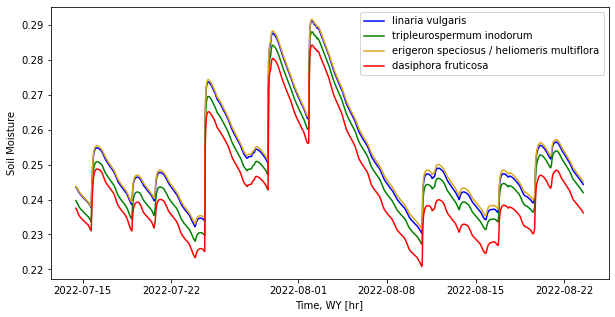

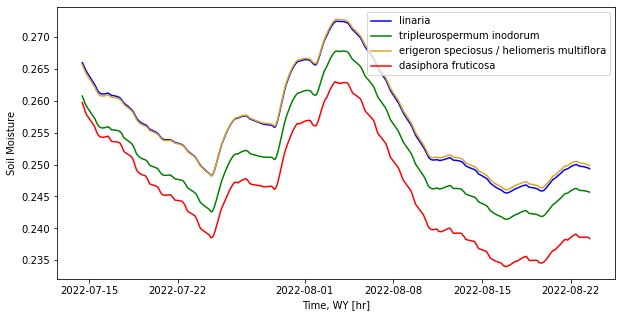

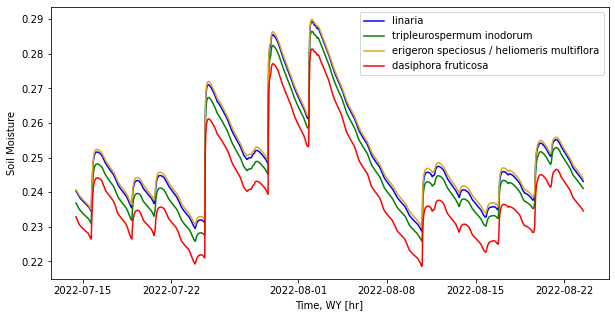

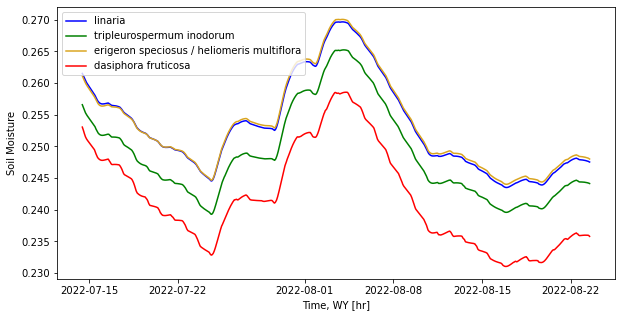

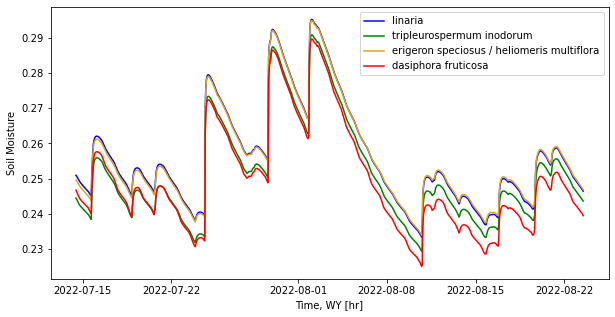

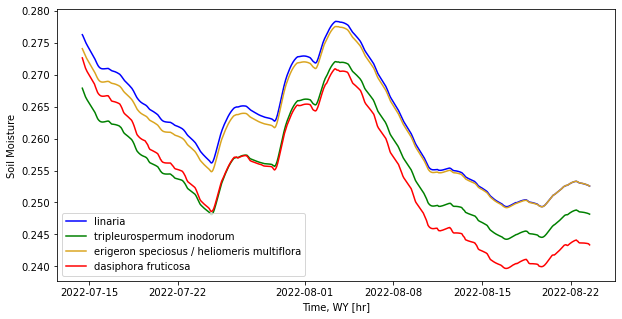

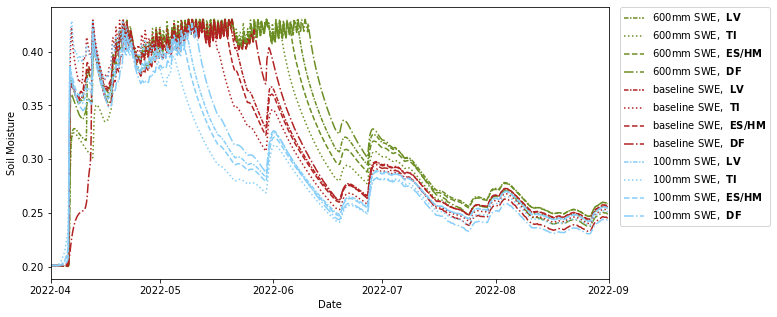

In [3]:
#SOIL MOISTURE TRACES
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from glob import glob
d1 = datetime(2022, 4, 1,0) 
d2 = datetime(2022, 8, 31,19)
dt = timedelta(hours = 1)
days = np.arange(d1, d2, dt).astype(datetime)
print(np.size(days))

files = glob(path+"/run1.out.satur.*.pfb")
sat_basea=pf.read_pfb_sequence(files)

files = glob(path+"/run2.out.satur.*.pfb")
sat_baseb=pf.read_pfb_sequence(files)

files = glob(path+"/run3.out.satur.*.pfb")
sat_basec=pf.read_pfb_sequence(files)

files = glob(path+"/run4.out.satur.*.pfb")
sat_based=pf.read_pfb_sequence(files)

files = glob(path+"/swe100a.out.satur.*.pfb")
sat_swe100a=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300a.out.satur.*.pfb")
sat_swe1300a=pf.read_pfb_sequence(files)

files = glob(path+"/swe100b.out.satur.*.pfb")
sat_swe100b=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300b.out.satur.*.pfb")
sat_swe1300b=pf.read_pfb_sequence(files)

files = glob(path+"/swe100c.out.satur.*.pfb")
sat_swe100c=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300c.out.satur.*.pfb")
sat_swe1300c=pf.read_pfb_sequence(files)

files = glob(path+"/swe100d.out.satur.*.pfb")
sat_swe100d=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300d.out.satur.*.pfb")
sat_swe1300d=pf.read_pfb_sequence(files)

print(np.size(sat_swe1300c))

sm10_basea=sat_basea[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_basea=sat_basea[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

sm10_baseb=sat_baseb[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_baseb=sat_baseb[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

sm10_basec=sat_basec[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_basec=sat_basec[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

sm10_based=sat_based[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_based=sat_based[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

sm10_swe100a=sat_swe100a[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_swe100a=sat_swe100a[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

sm10_swe1300a=sat_swe1300a[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_swe1300a=sat_swe1300a[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

sm10_swe100b=sat_swe100b[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_swe100b=sat_swe100b[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

sm10_swe1300b=sat_swe1300b[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_swe1300b=sat_swe1300b[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

sm10_swe100c=sat_swe100c[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_swe100c=sat_swe100c[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

sm10_swe1300c=sat_swe1300c[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_swe1300c=sat_swe1300c[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

sm10_swe100d=sat_swe100d[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_swe100d=sat_swe100d[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

sm10_swe1300d=sat_swe1300d[:,18,0,0]*swe100c.Geom.domain.Porosity.Value
sm20_swe1300d=sat_swe1300d[:,16,0,0]*swe100c.Geom.domain.Porosity.Value

print(np.size(sm10_swe1300c))


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10_basea[2507:3469], color='b',label='linaria vulgaris') #
ax.plot(days[2507:3469],sm10_baseb[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm10_basec[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm10_based[2507:3469], color='r',label="dasiphora fruticosa")#
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm20_basea[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm20_baseb[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm20_basec[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm20_based[2507:3469], color='r',label="dasiphora fruticosa")#
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10_swe100a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm10_swe100b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm10_swe100c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm10_swe100d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm20_swe100a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm20_swe100b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm20_swe100c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm20_swe100d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10_swe1300a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm10_swe1300b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm10_swe1300c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm10_swe1300d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm20_swe1300a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm20_swe1300b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm20_swe1300c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm20_swe1300d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')





fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(days,sm20_swe1300a,linestyle=(0, (3, 1, 1, 1)),color='olivedrab',label='600mm SWE,  $\\bf{LV}$') #
ax.plot(days,sm20_swe1300b, color='olivedrab',linestyle='dotted',label="600mm SWE,  $\\bf{TI}$")#
ax.plot(days,sm20_swe1300c, color='olivedrab',linestyle='dashed',label="600mm SWE,  $\\bf{ES/HM}$")#
ax.plot(days,sm20_swe1300d, color='olivedrab',linestyle='dashdot',label="600mm SWE,  $\\bf{DF}$")#

ax.plot(days,sm20_basea,linestyle=(0, (3, 1, 1, 1)),color='firebrick',label='baseline SWE,  $\\bf{LV}$') #
ax.plot(days,sm20_baseb, color='firebrick',linestyle='dotted',label="baseline SWE,  $\\bf{TI}$")#
ax.plot(days,sm20_basec, color='firebrick',linestyle='dashed',label="baseline SWE,  $\\bf{ES/HM}$")#
ax.plot(days,sm20_based, color='firebrick',linestyle='dashdot',label="baseline SWE,  $\\bf{DF}$")#

ax.plot(days,sm20_swe100a,linestyle=(0, (3, 1, 1, 1)),color='lightskyblue',label='100mm SWE,  $\\bf{LV}$') #
ax.plot(days,sm20_swe100b, color='lightskyblue',linestyle='dotted',label="100mm SWE,  $\\bf{TI}$")#
ax.plot(days,sm20_swe100c, color='lightskyblue',linestyle='dashed',label="100mm SWE,  $\\bf{ES/HM}$")#
ax.plot(days,sm20_swe100d, color='lightskyblue',linestyle='dashdot',label="100mm SWE,  $\\bf{DF}$")#



ax.set_xlim(datetime(2022, 4, 1,0),datetime(2022, 9, 1,0))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel('Date')
ax.set_ylabel('Soil Moisture')

Text(0, 0.5, 'Soil Moisture')

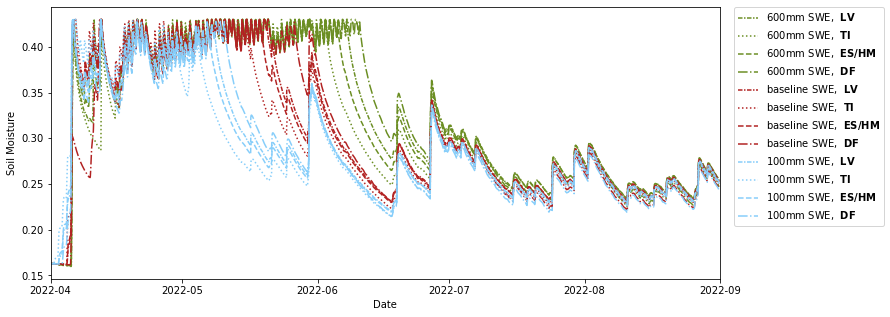

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(days,sm10_swe1300a,linestyle=(0, (3, 1, 1, 1)),color='olivedrab',label='600mm SWE,  $\\bf{LV}$') #
ax.plot(days,sm10_swe1300b, color='olivedrab',linestyle='dotted',label="600mm SWE,  $\\bf{TI}$")#
ax.plot(days,sm10_swe1300c, color='olivedrab',linestyle='dashed',label="600mm SWE,  $\\bf{ES/HM}$")#
ax.plot(days,sm10_swe1300d, color='olivedrab',linestyle='dashdot',label="600mm SWE,  $\\bf{DF}$")#

ax.plot(days,sm10_basea,linestyle=(0, (3, 1, 1, 1)),color='firebrick',label='baseline SWE,  $\\bf{LV}$') #
ax.plot(days,sm10_baseb, color='firebrick',linestyle='dotted',label="baseline SWE,  $\\bf{TI}$")#
ax.plot(days,sm10_basec, color='firebrick',linestyle='dashed',label="baseline SWE,  $\\bf{ES/HM}$")#
ax.plot(days,sm10_based, color='firebrick',linestyle='dashdot',label="baseline SWE,  $\\bf{DF}$")#

ax.plot(days,sm10_swe100a,linestyle=(0, (3, 1, 1, 1)),color='lightskyblue',label='100mm SWE,  $\\bf{LV}$') #
ax.plot(days,sm10_swe100b, color='lightskyblue',linestyle='dotted',label="100mm SWE,  $\\bf{TI}$")#
ax.plot(days,sm10_swe100c, color='lightskyblue',linestyle='dashed',label="100mm SWE,  $\\bf{ES/HM}$")#
ax.plot(days,sm10_swe100d, color='lightskyblue',linestyle='dashdot',label="100mm SWE,  $\\bf{DF}$")#



ax.set_xlim(datetime(2022, 4, 1,0),datetime(2022, 9, 1,0))
#ax.set_ylim(0.19,0.45)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel('Date')
ax.set_ylabel('Soil Moisture')

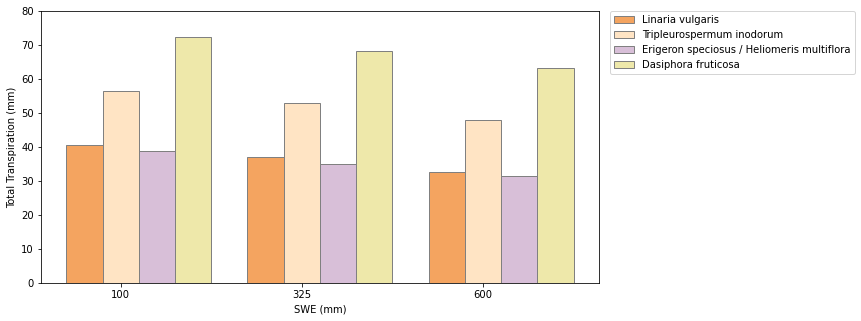

In [4]:
#TRANSPIRATION

files = glob(path+"/run1.out.clm_output.*.pfb")
CLM_basea=pf.read_pfb_sequence(files)

files = glob(path+"/run2.out.clm_output.*.pfb")
CLM_baseb=pf.read_pfb_sequence(files)

files = glob(path+"/run3.out.clm_output.*.pfb")
CLM_basec=pf.read_pfb_sequence(files)

files = glob(path+"/run4.out.clm_output.*.pfb")
CLM_based=pf.read_pfb_sequence(files)

files = glob(path+"/swe100a.out.clm_output.*.pfb")
CLM_swe100a=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300a.out.clm_output.*.pfb")
CLM_swe1300a=pf.read_pfb_sequence(files)

files = glob(path+"/swe100b.out.clm_output.*.pfb")
CLM_swe100b=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300b.out.clm_output.*.pfb")
CLM_swe1300b=pf.read_pfb_sequence(files)

files = glob(path+"/swe100c.out.clm_output.*.pfb")
CLM_swe100c=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300c.out.clm_output.*.pfb")
CLM_swe1300c=pf.read_pfb_sequence(files)

files = glob(path+"/swe100d.out.clm_output.*.pfb")
CLM_swe100d=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300d.out.clm_output.*.pfb")
CLM_swe1300d=pf.read_pfb_sequence(files)

tbasea=np.sum(CLM_basea[:,8,0,0])*60*60
tbaseb=np.sum(CLM_baseb[:,8,0,0])*60*60
tbasec=np.sum(CLM_basec[:,8,0,0])*60*60
tbased=np.sum(CLM_based[:,8,0,0])*60*60
tswe100a=np.sum(CLM_swe100a[:,8,0,0])*60*60
tswe100b=np.sum(CLM_swe100b[:,8,0,0])*60*60
tswe100c=np.sum(CLM_swe100c[:,8,0,0])*60*60
tswe100d=np.sum(CLM_swe100d[:,8,0,0])*60*60
tswe1300a=np.sum(CLM_swe1300a[:,8,0,0])*60*60
tswe1300b=np.sum(CLM_swe1300b[:,8,0,0])*60*60
tswe1300c=np.sum(CLM_swe1300c[:,8,0,0])*60*60
tswe1300d=np.sum(CLM_swe1300d[:,8,0,0])*60*60

fig, ax = plt.subplots(figsize=(10, 5))
SWE600mm=[tswe1300a,tswe1300b,tswe1300c,tswe1300d]
SWEbase=[tbasea,tbaseb,tbasec,tbased]
SWE100mm=[tswe100a,tswe100b,tswe100c,tswe100d]

linaria_vulgaris=[tswe100a,tbasea,tswe1300a]
tripleurospermum_inodorum=[tswe100b,tbaseb,tswe1300b]
erigeron_speciosus_heliomeris_multiflora=[tswe100c,tbasec,tswe1300c]
dasiphora_fructicosa=[tswe100d,tbased,tswe1300d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='Tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')

plt.xlabel('SWE (mm)')
plt.ylabel('Total Transpiration (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['100','325','600'])

plt.ylim(0,80)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


#tPlot, axs = plt.subplots(figsize=(13,8),nrows=4, ncols=1, sharex=True, sharey=True, gridspec_kw={'height_ratios':[2,2,2,2]})
#tPlot.suptitle('Transpiration', fontsize=20)
#axs[0].plot(CLM_swe100a[:,8,0,0],color='b',label='linaria')
#axs[1].plot(CLM_basea[:,8,0,0],color='g',label="tripleurospermum inodorum")
#axs[2].plot(CLM_swe1300a[:,8,0,0],color='goldenrod',label="erigeron speciosus / heliomeris multiflora")
#axs[3].plot(CLM_swe100b[:,8,0,0], color='r',label="dasiphora fruticosa")
#axs[3].set_xlabel('Time, WY [hr]')
#axs[1].set_ylabel('Transpiration [mm/s]')
#plt.show()

#tPlot, axs = plt.subplots(figsize=(13,8),nrows=4, ncols=1, sharex=True, sharey=True, gridspec_kw={'height_ratios':[2,2,2,2]})
#tPlot.suptitle('Net ET and Soil Evap', fontsize=20)
#axs[0].plot(CLM_data1[:,4,0,0],color='b',label='linaria')
#axs[1].plot(CLM_data3[:,4,0,0],color='g',label="tripleurospermum inodorum")
#axs[2].plot(CLM_data4[:,4,0,0],color='goldenrod',label="erigeron speciosus / heliomeris multiflora")
#axs[3].plot(CLM_data5[:,4,0,0], color='r',label="dasiphora fruticosa")
#axs[3].set_xlabel('Time, WY [hr]')
#axs[1].set_ylabel('Net ET [mm/s]')
#plt.show()



#print("total trans: ", np.sum(CLM_data[:,8,0,0]))
#print("total net ET: ", np.sum(CLM_data[:,4,0,0]))

/home/ajcao/pfclm_sc
/home/ajcao/pfclm_sc/outputs


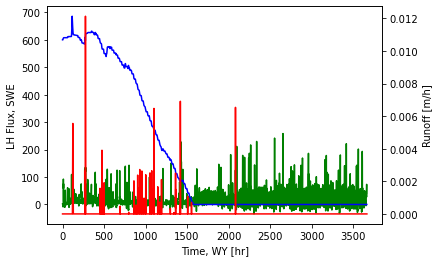

--- 26.028085470199585 seconds ---


Text(0, 0.5, 'Soil Moisture')

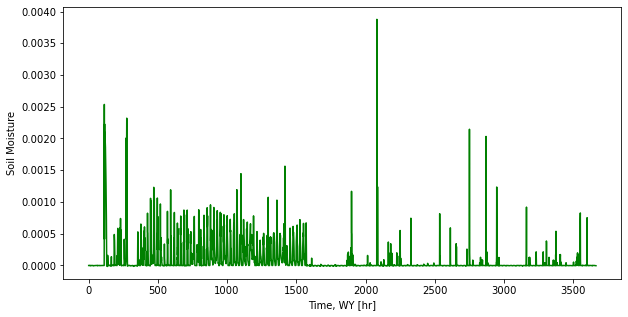

In [2]:
## load PFCLM output and make example plots
## PFB read as a sequence

import parflow as pf
import matplotlib.pyplot as plt
import numpy as np
#import netCDF4 as nc
import xarray as xr
import time as timer
from parflow.tools.fs import get_absolute_path
from glob import glob

start_time = timer.time()

print(os.getcwd())
relative_path_to_runfolder = 'outputs'
path = get_absolute_path(relative_path_to_runfolder)
print(path)

# intialize data and time arrays
#data    = np.zeros([8,3666]) #8760 8,8760
time    = np.zeros([8760])

# reading the CLM file PFCLM_SC.out.clm_output.<file number>.C.pfb
# variables are by layer:
# 0  total latent heat flux (Wm-2)
# 1  total upward LW radiation (Wm-2)
# 2  total sensible heat flux (Wm-2)
# 3  ground heat flux (Wm-2)
# 4  net veg. evaporation and transpiration and soil evaporation (mms-1)
# 5  ground evaporation (mms-1)
# 6  soil evaporation (mms-1)
# 7  vegetation evaporation (canopy) and transpiration (mms-1)
# 8  transpiration (mms-1)
# 9  infiltration flux (mms-1)
# 10 SWE (mm)
# 11 ground temperature (K)
# 12 irrigation flux
# 13 - 24 Soil temperature by layer (K)

slope    = 0.05
mannings = 2.e-6
# loop over a year and assemble files to be loaded as an entire sequence
# then map specific variables to the data array which holds things for analysis
# and plotting

files = glob(path+"/swe1300c.out.clm_output.*.C.pfb")
CLM_data = pf.read_pfb_sequence(files)

files = glob(path+"/swe1300c.out.press.*.pfb")
pf_data = pf.read_pfb_sequence(files)    
# calculate runoff
runoff = (np.sqrt(slope)/mannings) * np.maximum(pf_data[:,19,0,0],0.0)**(5.0/3.0)


files = glob(path+"/swe1300c.out.satur.*.pfb")
sat_data=pf.read_pfb_sequence(files)

# Plot LH Flux, SWE and Runoff
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(CLM_data[:,0,0,0], color='g')
ax.plot(CLM_data[:,10,0,0], color='b')
ax2.plot(runoff[:], color='r')
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('LH Flux, SWE')
ax2.set_ylabel('Runoff [m/h]')
plt.show()

print("--- %s seconds ---" % (timer.time() - start_time))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(CLM_data[:,9,0,0], color='g',label='Infiltration Flux') #
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

[32.56949600527161, 47.816238230102705, 31.48969991031486, 63.31293569592235]
[36.961288610583296, 52.872912723310534, 35.110424375925774, 68.19911588974327]
[40.56349742291914, 56.33661977912893, 38.80888931019644, 72.32419823041118]
-4.391792605311686
3.6022088123358458
-5.056674493207829


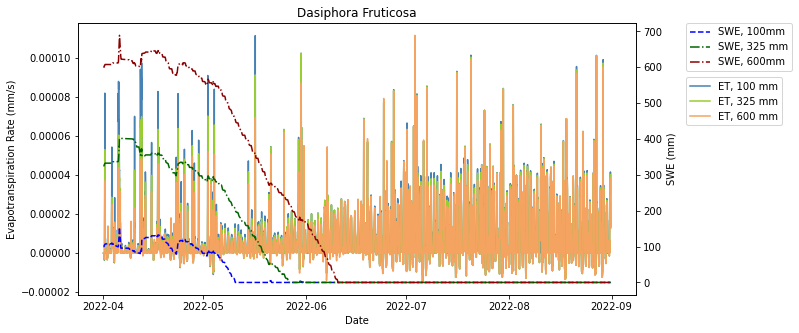

In [143]:
#TIME SERIES, ET, SWE
print(SWE600mm)
print(SWEbase)
print(SWE100mm)

fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(days[0:3666],CLM_swe100d[:,7,0,0],label='ET, 100 mm',color='steelblue')
ax.plot(days[0:3666],CLM_based[:,7,0,0],label="ET, 325 mm", color='yellowgreen')
ax.plot(days[0:3666],CLM_swe1300d[:,7,0,0],label="ET, 600 mm",color='sandybrown')
ax2.plot(days[0:3666],CLM_swe100d[:,10,0,0],label='SWE, 100mm',color='blue',linestyle='--')
ax2.plot(days[0:3666],CLM_based[:,10,0,0],label='SWE, 325 mm',color='darkgreen',linestyle='dashdot')
ax2.plot(days[0:3666],CLM_swe1300d[:,10,0,0],label='SWE, 600mm',color='darkred',linestyle='dashdot')



ax.set_ylabel('Evapotranspiration Rate (mm/s)')
ax.set_xlabel('Date')
ax2.set_ylabel('SWE (mm)')
ax.legend(bbox_to_anchor=(1.09, 0.8), loc='upper left', borderaxespad=0)
ax2.legend(bbox_to_anchor=(1.09, 1), loc='upper left', borderaxespad=0)

ax.set_title('Dasiphora Fruticosa')
print(SWE600mm[0]-SWEbase[0])
print(SWE100mm[0]-SWEbase[0])
print(SWE600mm[1]-SWEbase[1])

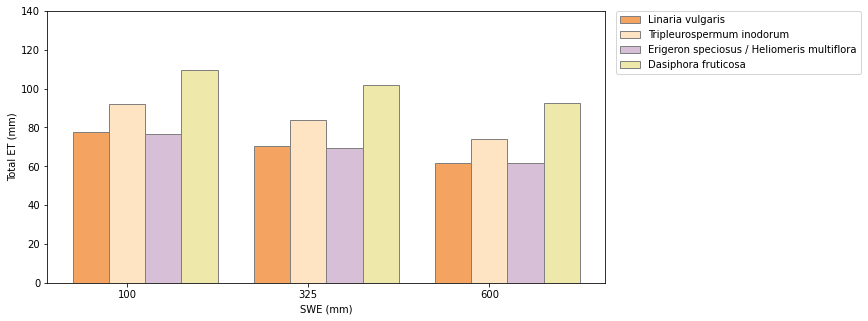

In [5]:
#ET
tbasea=np.sum(CLM_basea[:,7,0,0])*60*60
tbaseb=np.sum(CLM_baseb[:,7,0,0])*60*60
tbasec=np.sum(CLM_basec[:,7,0,0])*60*60
tbased=np.sum(CLM_based[:,7,0,0])*60*60
tswe100a=np.sum(CLM_swe100a[:,7,0,0])*60*60
tswe100b=np.sum(CLM_swe100b[:,7,0,0])*60*60
tswe100c=np.sum(CLM_swe100c[:,7,0,0])*60*60
tswe100d=np.sum(CLM_swe100d[:,7,0,0])*60*60
tswe1300a=np.sum(CLM_swe1300a[:,7,0,0])*60*60
tswe1300b=np.sum(CLM_swe1300b[:,7,0,0])*60*60
tswe1300c=np.sum(CLM_swe1300c[:,7,0,0])*60*60
tswe1300d=np.sum(CLM_swe1300d[:,7,0,0])*60*60

fig, ax = plt.subplots(figsize=(10, 5))
SWE600mm=[tswe1300a,tswe1300b,tswe1300c,tswe1300d]
SWEbase=[tbasea,tbaseb,tbasec,tbased]
SWE100mm=[tswe100a,tswe100b,tswe100c,tswe100d]

linaria_vulgaris=[tswe100a,tbasea,tswe1300a]
tripleurospermum_inodorum=[tswe100b,tbaseb,tswe1300b]
erigeron_speciosus_heliomeris_multiflora=[tswe100c,tbasec,tswe1300c]
dasiphora_fructicosa=[tswe100d,tbased,tswe1300d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='Tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')

plt.xlabel('SWE (mm)')
plt.ylabel('Total ET (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['100','325','600'])

plt.ylim(0,140)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [145]:
print(SWE600mm)
print(SWEbase)
print(SWE100mm)


print(SWE600mm[0]-SWEbase[0])
print(SWE100mm[0]-SWEbase[0])
print(SWE600mm[1]-SWEbase[1])

[61.78597774843761, 74.07971975732012, 61.69084468181856, 92.77790581251018]
[70.67997897865304, 83.96018788457101, 69.47750313673008, 101.638196027005]
[77.80528064814195, 92.0044062008879, 76.62232217094997, 109.44494953090863]
-8.89400123021543
7.1253016694889055
-9.880468127250893


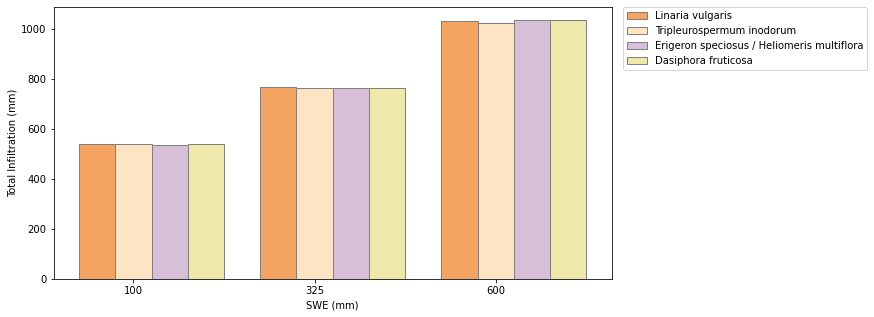

In [6]:
#WATER BALANCE
#INFILTRATION

files = glob(path+"/run1.out.press.*.pfb")
pf_basea=pf.read_pfb_sequence(files)

files = glob(path+"/run2.out.press.*.pfb")
pf_baseb=pf.read_pfb_sequence(files)

files = glob(path+"/run3.out.press.*.pfb")
pf_basec=pf.read_pfb_sequence(files)

files = glob(path+"/run4.out.press.*.pfb")
pf_based=pf.read_pfb_sequence(files)

files = glob(path+"/swe100a.out.press.*.pfb")
pf_swe100a=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300a.out.press.*.pfb")
pf_swe1300a=pf.read_pfb_sequence(files)

files = glob(path+"/swe100b.out.press.*.pfb")
pf_swe100b=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300b.out.press.*.pfb")
pf_swe1300b=pf.read_pfb_sequence(files)

files = glob(path+"/swe100c.out.press.*.pfb")
pf_swe100c=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300c.out.press.*.pfb")
pf_swe1300c=pf.read_pfb_sequence(files)

files = glob(path+"/swe100d.out.press.*.pfb")
pf_swe100d=pf.read_pfb_sequence(files)

files = glob(path+"/swe1300d.out.press.*.pfb")
pf_swe1300d=pf.read_pfb_sequence(files)

ibasea=np.sum(CLM_basea[:,9,0,0])*60*60
ibaseb=np.sum(CLM_baseb[:,9,0,0])*60*60
ibasec=np.sum(CLM_basec[:,9,0,0])*60*60
ibased=np.sum(CLM_based[:,9,0,0])*60*60
iswe100a=np.sum(CLM_swe100a[:,9,0,0])*60*60
iswe100b=np.sum(CLM_swe100b[:,9,0,0])*60*60
iswe100c=np.sum(CLM_swe100c[:,9,0,0])*60*60
iswe100d=np.sum(CLM_swe100d[:,9,0,0])*60*60
iswe1300a=np.sum(CLM_swe1300a[:,9,0,0])*60*60
iswe1300b=np.sum(CLM_swe1300b[:,9,0,0])*60*60
iswe1300c=np.sum(CLM_swe1300c[:,9,0,0])*60*60
iswe1300d=np.sum(CLM_swe1300d[:,9,0,0])*60*60


fig, ax = plt.subplots(figsize=(10, 5))
SWE600mm=[iswe1300a,iswe1300b,iswe1300c,iswe1300d]
SWEbase=[ibasea,ibaseb,ibasec,ibased]
SWE100mm=[iswe100a,iswe100b,iswe100c,iswe100d]

linaria_vulgaris=[iswe100a,ibasea,iswe1300a]
tripleurospermum_inodorum=[iswe100b,ibaseb,iswe1300b]
erigeron_speciosus_heliomeris_multiflora=[iswe100c,ibasec,iswe1300c]
dasiphora_fructicosa=[iswe100d,ibased,iswe1300d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='Tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')


plt.xlabel('SWE (mm)')
plt.ylabel('Total Infiltration (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['100','325','600'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()




In [7]:
print(SWE600mm)
print(SWEbase)
print(SWE100mm)

[1032.0916754874647, 1023.7358722085954, 1035.3309623121258, 1034.069212084223]
[765.2986216222073, 762.4815425138243, 763.6626048090494, 765.0847224119138]
[538.7750775780839, 541.1043040900194, 536.7959694727017, 537.3019340813474]


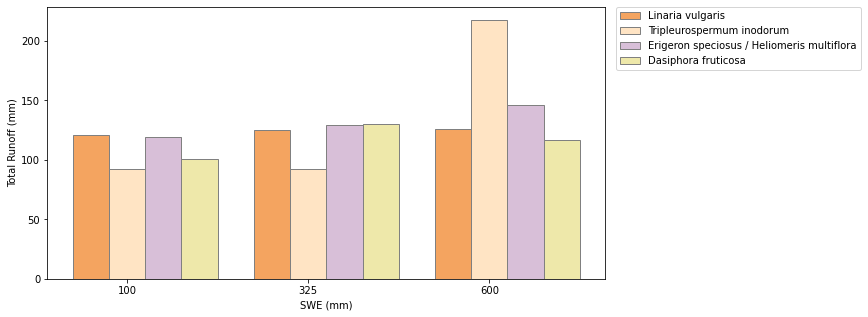

In [8]:
#RUNOFF
rbasea = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_basea[:,19,0,0],0.0)**(5.0/3.0))*1000
rbaseb = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_baseb[:,19,0,0],0.0)**(5.0/3.0))*1000
rbasec = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_basec[:,19,0,0],0.0)**(5.0/3.0))*1000
rbased = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_based[:,19,0,0],0.0)**(5.0/3.0))*1000
rswe100a = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_swe100a[:,19,0,0],0.0)**(5.0/3.0))*1000
rswe1300a = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_swe1300a[:,19,0,0],0.0)**(5.0/3.0))*1000
rswe100b = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_swe100b[:,19,0,0],0.0)**(5.0/3.0))*1000
rswe1300b = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_swe1300b[:,19,0,0],0.0)**(5.0/3.0))*1000
rswe100c = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_swe100c[:,19,0,0],0.0)**(5.0/3.0))*1000
rswe1300c = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_swe1300c[:,19,0,0],0.0)**(5.0/3.0))*1000
rswe100d = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_swe100d[:,19,0,0],0.0)**(5.0/3.0))*1000
rswe1300d = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_swe1300d[:,19,0,0],0.0)**(5.0/3.0))*1000



fig, ax = plt.subplots(figsize=(10, 5))
SWE600mm=[rswe1300a,rswe1300b,rswe1300c,rswe1300d]
SWEbase=[rbasea,rbaseb,rbasec,rbased]
SWE100mm=[rswe100a,rswe100b,rswe100c,rswe100d]

linaria_vulgaris=[rswe100a,rbasea,rswe1300a]
tripleurospermum_inodorum=[rswe100b,rbaseb,rswe1300b]
erigeron_speciosus_heliomeris_multiflora=[rswe100c,rbasec,rswe1300c]
dasiphora_fructicosa=[rswe100d,rbased,rswe1300d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='Tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')

plt.xlabel('SWE (mm)')
plt.ylabel('Total Runoff (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['100','325','600'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()



In [9]:
print(SWE600mm)
print(SWEbase)
print(SWE100mm)

[125.5658642139173, 217.619389905247, 146.24480959285498, 116.58152895723839]
[125.06355201702429, 92.51943827762877, 129.31235177210553, 129.84051705786638]
[120.77882304306004, 91.89621713522612, 118.97336235878412, 101.0477474628203]
